# Reports
   
       Have been included in README.md

# Problem 1

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

In [2]:
import wandb
wandb.login()

wandb: Currently logged in as: vineeth-bhat. Use `wandb login --relogin` to force relogin


True

In [7]:
data = pd.read_csv('WineQT.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


## 1.1 Dataset Analysis and Preprocessing

### Describe the dataset using mean, standard deviation, min, and max values for all attributes

In [50]:
# dropping id
data = data.drop('Id', axis=1)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


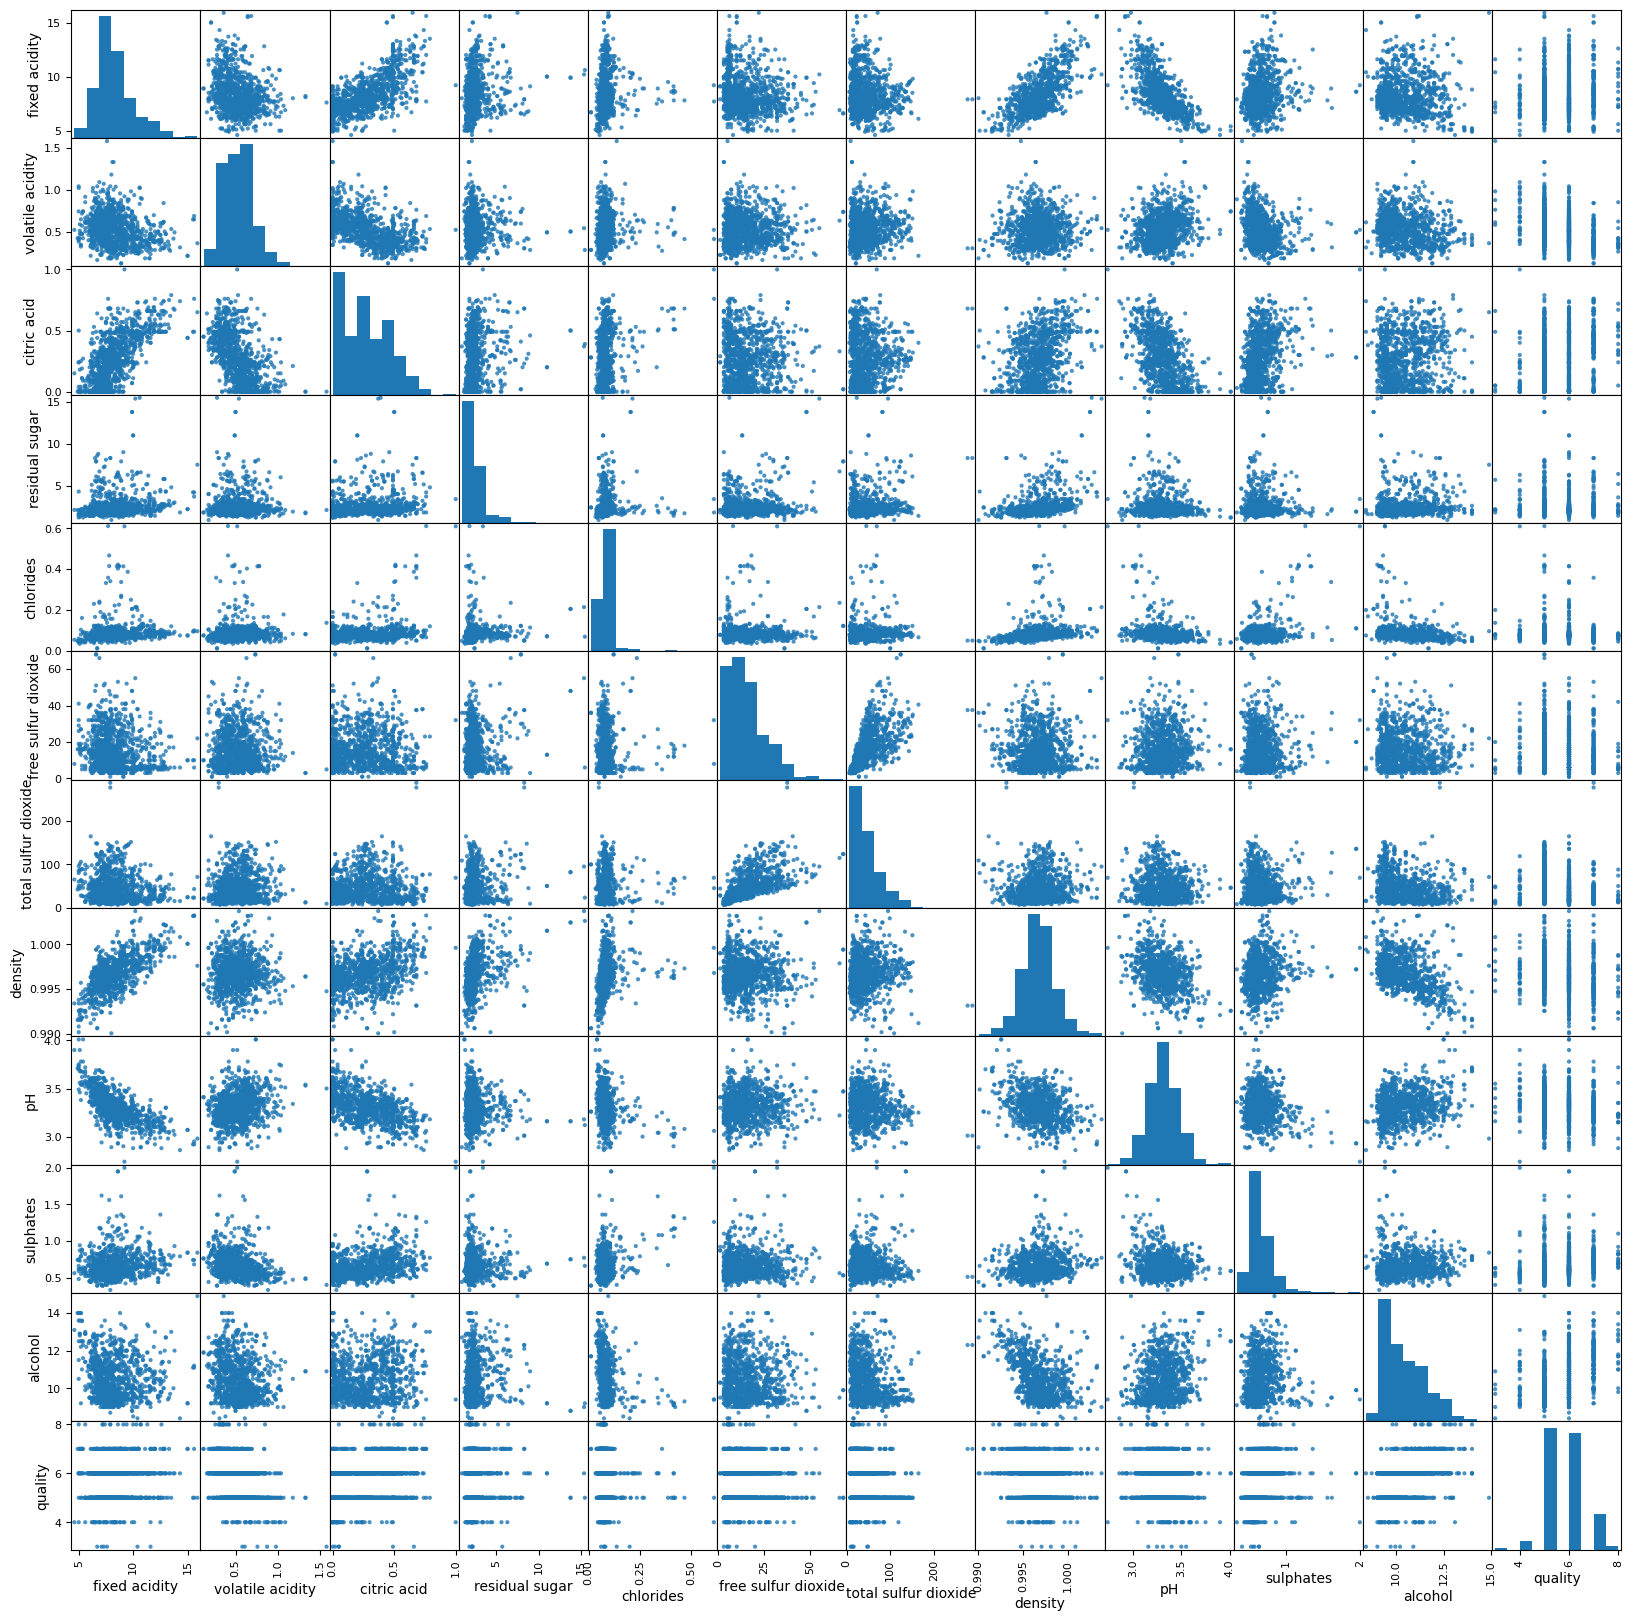

In [51]:
pd.plotting.scatter_matrix(data, alpha = 0.8, figsize=(20, 20))
plt.show()

In [52]:
mean_vals = data.mean()
std_dev_vals = data.std()
min_vals = data.min()
max_vals = data.max()

In [53]:
print("\t\t Means")
print(mean_vals)
print()

print("\t\t Standard Devs")
print(std_dev_vals)
print()
 
print("\t\t Mininums")
print(min_vals)
print()

print("\t\t Maximums")
print(max_vals)
print()

		 Means
fixed acidity            8.311111
volatile acidity         0.531339
citric acid              0.268364
residual sugar           2.532152
chlorides                0.086933
free sulfur dioxide     15.615486
total sulfur dioxide    45.914698
density                  0.996730
pH                       3.311015
sulphates                0.657708
alcohol                 10.442111
quality                  5.657043
dtype: float64

		 Standard Devs
fixed acidity            1.747595
volatile acidity         0.179633
citric acid              0.196686
residual sugar           1.355917
chlorides                0.047267
free sulfur dioxide     10.250486
total sulfur dioxide    32.782130
density                  0.001925
pH                       0.156664
sulphates                0.170399
alcohol                  1.082196
quality                  0.805824
dtype: float64

		 Mininums
fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar    

### Draw a graph that shows the distribution of the various labels across the entire dataset

In [54]:
quality_distro = data['quality'].value_counts()
quality_distro

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

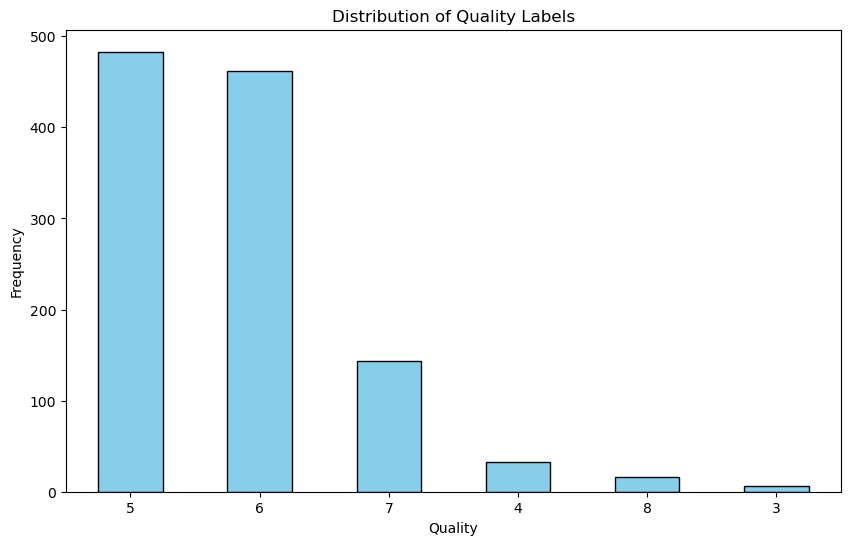

In [55]:
plt.figure(figsize=(10, 6))
quality_distro.plot(kind='bar', color='skyblue', edgecolor='black') # taken from GPT

plt.title('Distribution of Quality Labels')
plt.xlabel('Quality')
plt.ylabel('Frequency')

plt.xticks(rotation=0)
plt.show()

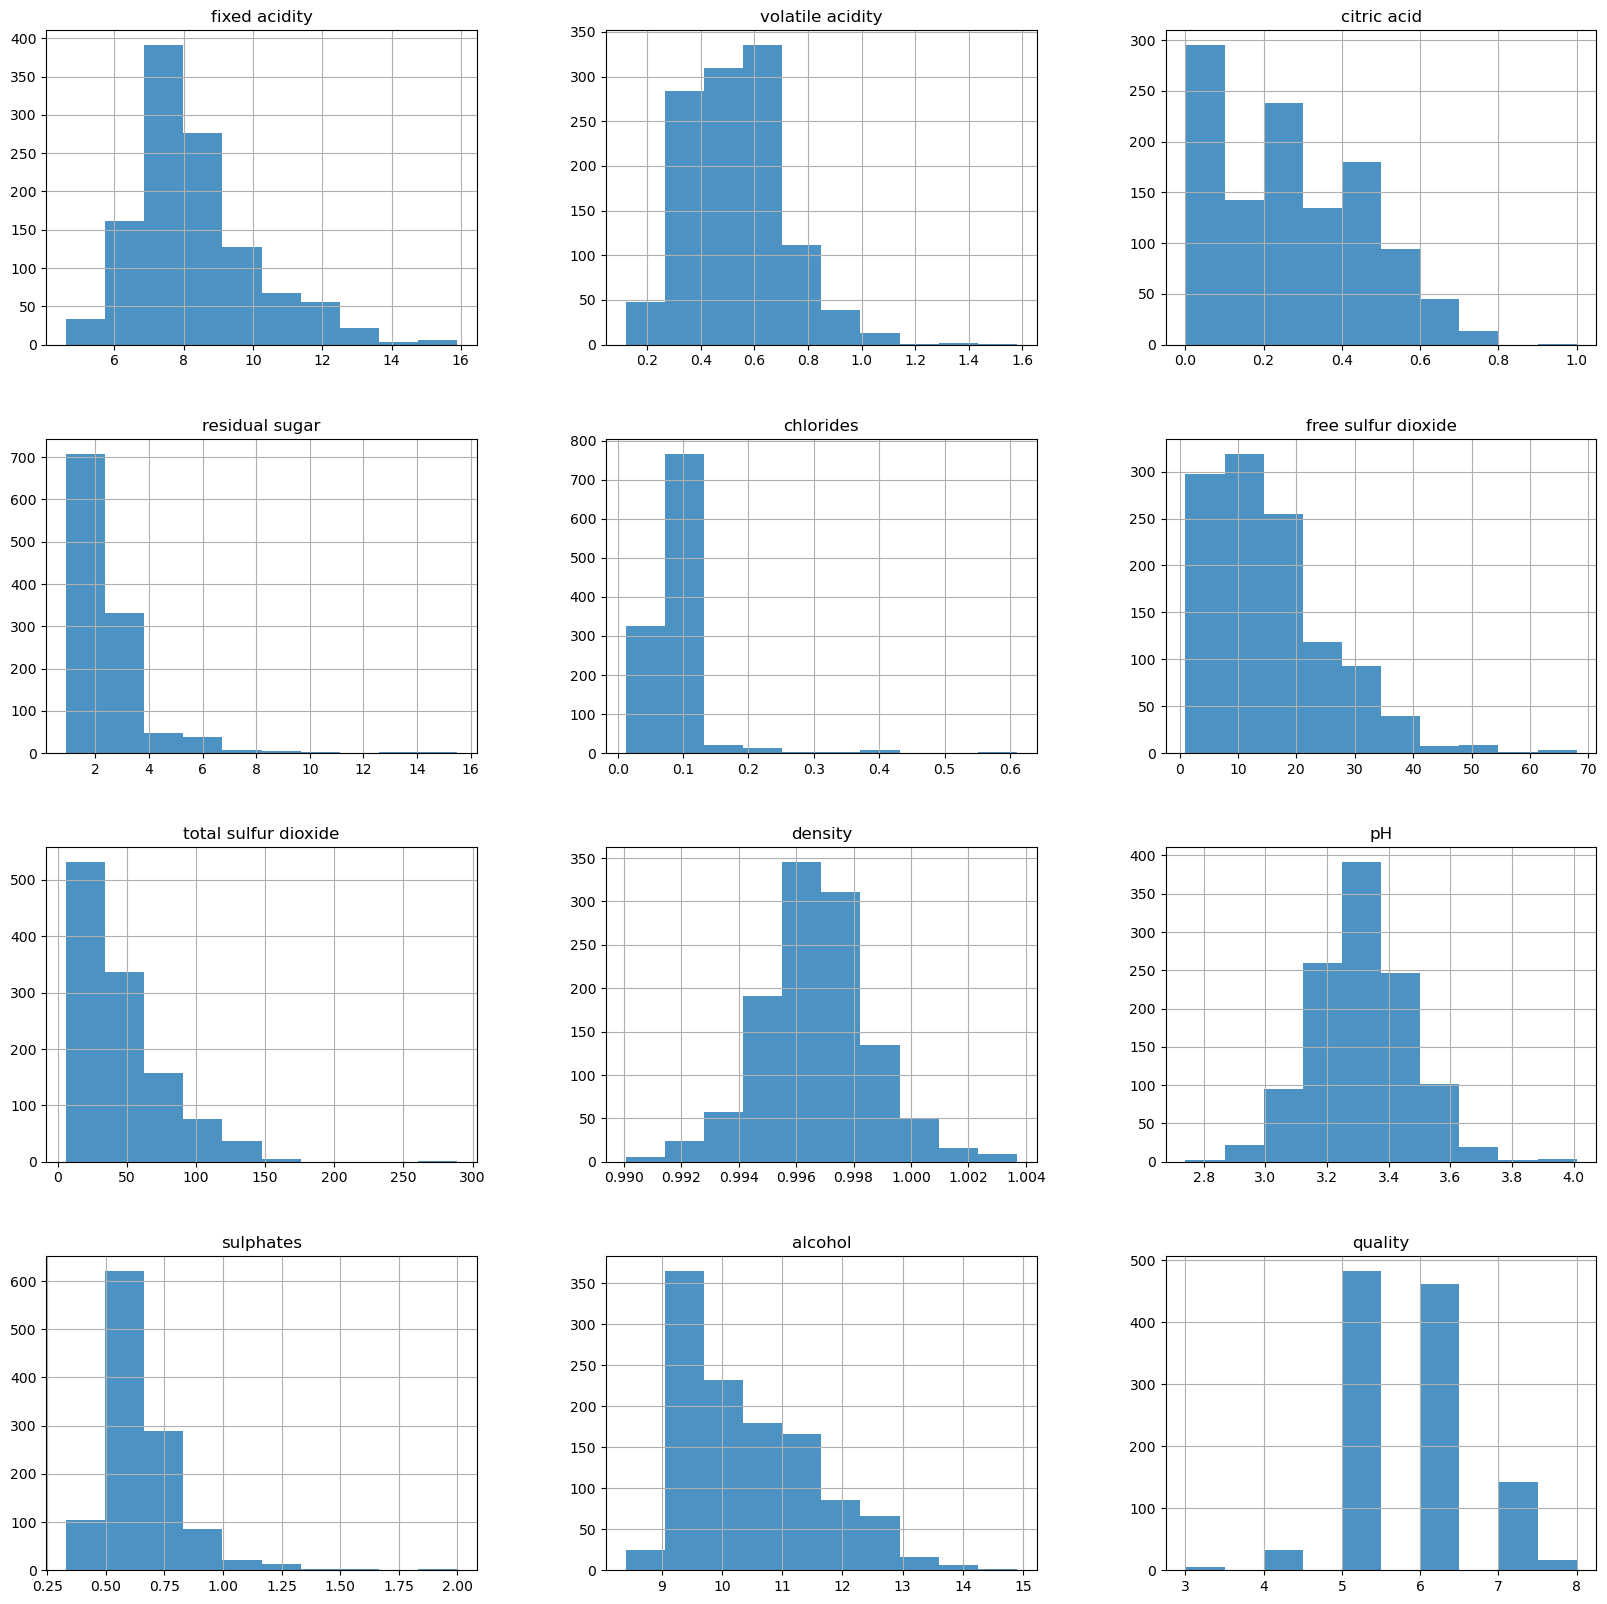

In [56]:
data.hist(alpha = 0.8, figsize=(20, 20))
plt.show()

### Partition the dataset into train, validation, and test sets

In [57]:
# dropping missing data
data.dropna(inplace=True)

# getting features and labels
features = data.drop('quality', axis = 1)
labels = data['quality']

# normalizing
scaler = StandardScaler()
features = scaler.fit_transform(features)

labels = labels.values

In [58]:
# train - 20%, test = 10%
X_train, X_test_val, y_train, y_test_val = train_test_split(features, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.33, random_state=42)

len(X_train), len(X_val), len(X_test)

(800, 229, 114)

### Normalise and standarize the data. Make sure to handle the missing or inconsistent data values if necessary

In [59]:
# Normalization done in last section
# missing or inconsisten values handles using SimpleImputer and DropNA before partitioning

### Clearly identify and justify the selection of the two most significant features

Following

    For parts 1.1.5 , 1.2.3, 2.3.2, train on both 2D dataset (using PCA) and the full dataset, visualise for the 2D dataset. Apologies for any confusion. Please do ask here and clarify any other confusion related to this on this thread.


In [60]:
pca = PCA(n_components=2)

features_pca = pca.fit_transform(features)

In [61]:
# diving using PCA
X_train_pca, X_test_val_pca, y_train_pca, y_test_val_pca = train_test_split(features_pca, labels, test_size=0.3, random_state=42)
X_val_pca, X_test_pca, y_val_pca, y_test_pca = train_test_split(X_test_val_pca, y_test_val_pca, test_size=0.33, random_state=42)

len(X_train_pca), len(X_val_pca), len(X_test_pca)

(800, 229, 114)

## 1.2 Model Building from Scratch

### Create a Multinomial Logistic Regression model from scratch and Use log loss

In [62]:
class LogisticRegression():
    def __init__(self, features, labels, num_classes, num_epochs = 1000, lr = 0.1):
        self.features = features
        self.labels = labels
        self.num_epochs = num_epochs
        self.lr = lr
        self.num_classes = num_classes # included as training data may not contain all possible labels
        self.num_samples = len(features)
        self.num_features = features.shape[1]
        self.actual_prob, self.ohe_dict = self.ohe(self.labels)
    
    def init_params(self):
        self.weights = np.random.rand(self.num_features, self.num_classes)
        self.biases = np.random.rand(self.num_classes)
        
    def softmax(self, matrix):
        exp_matrix = np.exp(matrix)
        return exp_matrix / np.sum(exp_matrix, axis = 1)[:, np.newaxis]
    
    def ohe(self, data):
        unique_data = np.unique(data)
        ohe = {}
        for i in range(len(unique_data)):
            cur_enc = [0] * len(unique_data)
            cur_enc[i] = 1
            ohe[unique_data[i]] = cur_enc
            
        ret_data = []
        for i in data:
            ret_data.append(ohe[i])
            
        return np.array(ret_data), ohe
    
    def log_loss(self, actual_prob, pred_probs):
        return np.sum(-actual_prob * np.log(pred_probs))
    
    def grad_desc(self, actual_prob, pred_probs):
        prob_diff = actual_prob - pred_probs
        
        # updaing parameters
        self.weights += self.lr * (self.features.T @ prob_diff / self.num_samples)
        self.biases += self.lr * (np.sum(prob_diff, axis = 0) / self.num_samples)
        
    def predict(self, features):
        pred_probs = self.softmax(features @ self.weights + self.biases)        
        pred_class_index = np.argmax(pred_probs, axis=1)

        pred_classes = []
        for ind in pred_class_index:
            for cur_class in self.ohe_dict:
                if self.ohe_dict[cur_class][ind] == 1:
                    pred_classes.append(cur_class)
        
        return np.array(pred_classes)
        
    def fit(self, print_per_epoch = False, print_discreteness = 100, validation_features = None, validation_labels = None, print_validation_metrics = True, wandb_en = False):
        self.init_params()
        
        if validation_labels is not None:
            actual_prob_validation = np.array([self.ohe_dict[i] for i in validation_labels])
                    
        for epoch in range(1, self.num_epochs+1):
            pre_soft_probs = self.features @ self.weights + self.biases
            pred_probs = self.softmax(pre_soft_probs)
            
            # calculating loss
            training_loss = self.log_loss(self.actual_prob, pred_probs)
                                    
            if print_per_epoch and epoch%print_discreteness == 0:
                print("Epoch {}: total training loss is {}".format(epoch, training_loss))
                
            # printing loss for validation set
            if validation_features is not None and validation_labels is not None and epoch%print_discreteness == 0:
                pre_soft_probs_validation = validation_features @ self.weights + self.biases
                pred_probs_validation = self.softmax(pre_soft_probs_validation)
                
                validation_loss = self.log_loss(actual_prob_validation, pred_probs_validation)
                
                
                
                # printing classification metrics
                predicted_validation_classes = self.predict(validation_features)
                classification_rep = classification_report(validation_labels, 
                                                           predicted_validation_classes,
                                                          zero_division = 0.0)
                
                if print_validation_metrics:
                    print("Epoch {}: total validation loss is {}".format(epoch, validation_loss))
                    print("Accuracy on validation set is {}".format(accuracy_score(validation_labels, predicted_validation_classes)))
                    print("Classification Report on Validation Set:")
                    print(classification_rep)
                    
                if wandb_en:
                    wandb.log({"acc": accuracy_score(validation_labels, predicted_validation_classes), "loss": validation_loss})
                
            self.grad_desc(self.actual_prob, pred_probs)

In [63]:
# using all attributes
myLR = LogisticRegression(X_train, y_train, 6, num_epochs=3000, lr = 0.01)
myLR.fit(print_per_epoch=True, print_discreteness=500, 
         validation_features=X_val, 
         validation_labels=y_val)

Epoch 500: total training loss is 964.4218272554506
Epoch 500: total validation loss is 281.9612246975347
Accuracy on validation set is 0.5414847161572053
Classification Report on Validation Set:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.54      0.72      0.62        86
           6       0.55      0.51      0.53       104
           7       0.56      0.29      0.38        31
           8       0.00      0.00      0.00         2

    accuracy                           0.54       229
   macro avg       0.33      0.30      0.31       229
weighted avg       0.53      0.54      0.52       229

Epoch 1000: total training loss is 842.9625104663077
Epoch 1000: total validation loss is 242.19511874082855
Accuracy on validation set is 0.5807860262008734
Classification Report on Validation Set:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
       

In [64]:
# Using PCA attributes
myLR = LogisticRegression(X_train_pca, y_train_pca, 6, num_epochs=3000, lr = 0.01)
myLR.fit(print_discreteness=500, validation_features=X_val_pca, validation_labels=y_val_pca)

Epoch 500: total validation loss is 289.9587426865392
Accuracy on validation set is 0.5283842794759825
Classification Report on Validation Set:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.56      0.64      0.59        86
           6       0.52      0.62      0.57       104
           7       0.25      0.03      0.06        31
           8       0.00      0.00      0.00         2

    accuracy                           0.53       229
   macro avg       0.26      0.26      0.24       229
weighted avg       0.48      0.53      0.49       229

Epoch 1000: total validation loss is 263.82980941519367
Accuracy on validation set is 0.5502183406113537
Classification Report on Validation Set:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.55      0.65      0.60        86
           6       0.55      0.63      0.59       104
    

In [65]:
pred_classes = myLR.predict(features_pca)
np.unique(pred_classes, return_counts=True)

(array([5, 6, 7]), array([533, 571,  39]))

In [66]:
np.unique(labels, return_counts=True)

(array([3, 4, 5, 6, 7, 8]), array([  6,  33, 483, 462, 143,  16]))

#### So, we see that
    since the number of classes 3, 4 and 8 are very small they are not classified

In [67]:
# prompted chatpgt for the code for plotting decision boundaries-  Give me code to show decision boundaries given the parameters of a logistic regression model

x_min, x_max = features_pca[:, 0].min() - 1, features_pca[:, 0].max() + 1
y_min, y_max = features_pca[:, 1].min() - 1, features_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Use the model to predict class labels for each point in the meshgrid
Z = myLR.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



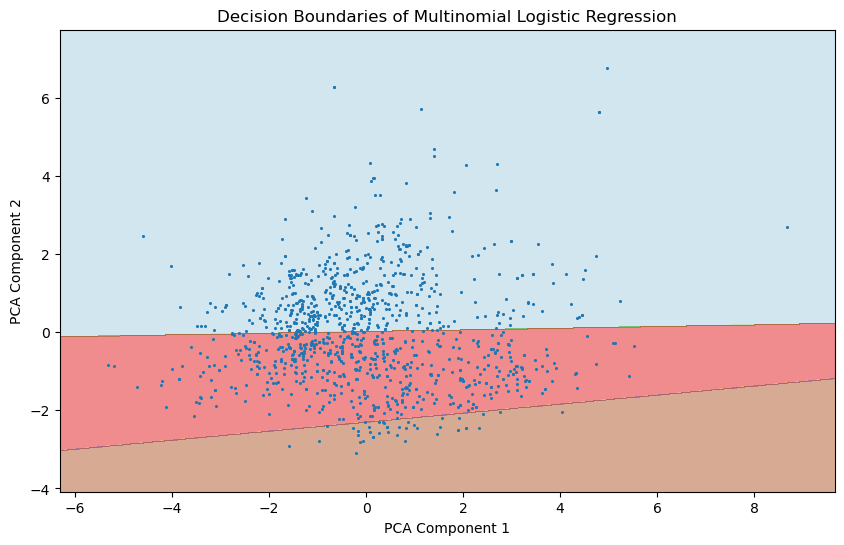

In [68]:
plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)
plt.scatter(features_pca[:,0], features_pca[:,1], s=1.5)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Decision Boundaries of Multinomial Logistic Regression')
plt.show()

## 1.3 Hyperparameter Tuning and Evaluation 

### Use your validation set and W&B logging to fine-tune the hyperparameters ( learning rate , epochs) for optimal results.

In [35]:
wandb.init(
    project="smai-A3-problem-1",
    
    config={
    "lr": 0.01,
    "epochs": 1000,
    }
)

myLR = LogisticRegression(X_train, y_train, 6, num_epochs =  wandb.config['epochs'], lr = wandb.config['lr'])
myLR.fit(print_discreteness=10, validation_features=X_val, validation_labels=y_val, print_validation_metrics = False, wandb_en = True)

wandb.finish()

acc,▁▂▂▃▃▄▄▅▅▆▆▇▇▇▇█████████████████████████
loss,█▇▇▆▆▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.58515
loss,243.90062


In [36]:
wandb.init(
    project="smai-A3-problem-1",
    
    config={
    "lr": 0.05,
    "epochs": 1000,
    }
)

myLR = LogisticRegression(X_train, y_train, 6, num_epochs =  wandb.config['epochs'], lr = wandb.config['lr'])
myLR.fit(print_discreteness=10, validation_features=X_val, validation_labels=y_val, print_validation_metrics = False, wandb_en = True)

wandb.finish()

acc,▁▃▅▆▇▇▇▇▇▇▇▇████████████████████████████
loss,█▆▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.63319
loss,210.67498


In [37]:
wandb.init(
    project="smai-A3-problem-1",
    
    config={
    "lr": 0.1,
    "epochs": 1000,
    }
)

myLR = LogisticRegression(X_train, y_train, 6, num_epochs =  wandb.config['epochs'], lr = wandb.config['lr'])
myLR.fit(print_discreteness=10, validation_features=X_val, validation_labels=y_val, print_validation_metrics = False, wandb_en = True)

wandb.finish()

acc,▁▆▇██▇██████████████████████████████████
loss,█▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.62882
loss,209.8875


In [38]:
wandb.init(
    project="smai-A3-problem-1",
    
    config={
    "lr": 0.01,
    "epochs": 5000,
    }
)

myLR = LogisticRegression(X_train, y_train, 6, num_epochs =  wandb.config['epochs'], lr = wandb.config['lr'])
myLR.fit(print_discreteness=10, validation_features=X_val, validation_labels=y_val, print_validation_metrics = False, wandb_en = True)

wandb.finish()

acc,▁▅▆▇▇▇▇█████████████████████████████████
loss,█▅▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.63319
loss,210.77763


In [39]:
wandb.init(
    project="smai-A3-problem-1",
    
    config={
    "lr": 0.1,
    "epochs": 5000,
    }
)

myLR = LogisticRegression(X_train, y_train, 6, num_epochs =  wandb.config['epochs'], lr = wandb.config['lr'])
myLR.fit(print_discreteness=10, validation_features=X_val, validation_labels=y_val, print_validation_metrics = False, wandb_en = True)

wandb.finish()

acc,▁▄▆▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.62009
loss,208.24927


In [40]:
wandb.init(
    project="smai-A3-problem-1",
    
    config={
    "lr": 0.005,
    "epochs": 5000,
    }
)

myLR = LogisticRegression(X_train, y_train, 6, num_epochs =  wandb.config['epochs'], lr = wandb.config['lr'])
myLR.fit(print_discreteness=10, validation_features=X_val, validation_labels=y_val, print_validation_metrics = False, wandb_en = True)

wandb.finish()

acc,▁▂▃▅▆▆▇▇▇▇▇▇█▇▇▇████████████████████████
loss,█▆▅▄▄▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.63755
loss,214.04695


In [41]:
wandb.init(
    project="smai-A3-problem-1",
    
    config={
    "lr": 0.001,
    "epochs": 5000,
    }
)

myLR = LogisticRegression(X_train, y_train, 6, num_epochs =  wandb.config['epochs'], lr = wandb.config['lr'])
myLR.fit(print_discreteness=10, validation_features=X_val, validation_labels=y_val, print_validation_metrics = False, wandb_en = True)

wandb.finish()

acc,▁▁▂▂▃▃▄▄▄▅▅▅▆▆▆▇▇▇▇▇▇▇▇▇████████████████
loss,██▇▇▇▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
acc,0.51965
loss,276.0354


In [42]:
wandb.init(
    project="smai-A3-problem-1",
    
    config={
    "lr": 0.001,
    "epochs": 15000,
    }
)

myLR = LogisticRegression(X_train, y_train, 6, num_epochs =  wandb.config['epochs'], lr = wandb.config['lr'])
myLR.fit(print_discreteness=10, validation_features=X_val, validation_labels=y_val, print_validation_metrics = False, wandb_en = True)

wandb.finish()

acc,▁▁▂▃▄▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████████
loss,█▇▆▅▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.62009
loss,224.30154


### We see that
    a learning rate of 0.05
    and 5000 epochs
    provides a good mix of high accuracy and low loss and a nice curve for both

In [73]:
optLR = LogisticRegression(X_train, y_train, 6, num_epochs = 5000, lr = 0.05)
optLR.fit(print_discreteness=10, validation_features=X_val, validation_labels=y_val, print_validation_metrics = False, wandb_en = False)

In [74]:
test_pred_classes = optLR.predict(X_test)
test_pred_classes

array([6, 6, 6, 7, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 7, 7, 6, 5, 6, 5, 5, 6,
       5, 5, 5, 4, 6, 5, 6, 5, 6, 6, 5, 6, 5, 7, 6, 5, 6, 6, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 7, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6,
       5, 6, 7, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5,
       5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 7, 5, 6, 6, 6, 5, 5, 6, 6,
       5, 5, 5, 5])

In [75]:
classification_rep = classification_report(y_test, 
                     test_pred_classes,
                     zero_division = 0.0)

print("\t\t For test")
print(classification_rep)

		 For test
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.71      0.70      0.71        57
           6       0.52      0.62      0.57        42
           7       0.43      0.30      0.35        10
           8       0.00      0.00      0.00         2

    accuracy                           0.61       114
   macro avg       0.33      0.32      0.33       114
weighted avg       0.59      0.61      0.59       114



---

# Problem 2

In [75]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

In [2]:
import wandb
wandb.login()

wandb: Currently logged in as: vineeth-bhat. Use `wandb login --relogin` to force relogin


True

In [3]:
data = pd.read_csv('WineQT.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
# dropping id
data = data.drop('Id', axis=1)
# dropping missing data
data.dropna(inplace=True)

# getting features and labels
features = data.drop('quality', axis = 1)
labels = data['quality']

# normalizing
scaler = StandardScaler()
features = scaler.fit_transform(features)

labels = labels.values
labels, features.shape

(array([5, 5, 5, ..., 5, 6, 5]), (1143, 11))

In [5]:
np.unique(labels, return_counts=True)

(array([3, 4, 5, 6, 7, 8]), array([  6,  33, 483, 462, 143,  16]))

In [6]:
# train - 20%, test = 10%
X_train, X_test_val, y_train, y_test_val = train_test_split(features, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.33, random_state=42)

len(X_train), len(X_val), len(X_test)

(800, 229, 114)

In [38]:
# setting seed for same results
np.random.seed(42)

## 2.1 Model Building from Scratch


In [188]:
class MLPClassifier:
    def __init__(self, features, labels, num_classes, num_epochs = 1000, lr = 0.1, 
                hidden_layers = [64, 64], activation = 'sigmoid', 
                 optimization_technique = 'batch_grad_des'):
        self.features = features
        self.labels = labels
        self.num_epochs = num_epochs
        self.lr = lr
        self.num_classes = num_classes # included as training data may not contain all possible labels
        self.num_samples = len(features)
        self.num_features = features.shape[1]
        self.actual_prob, self.ohe_dict = self.ohe(self.labels)
        
        # setting layers
        self.hidden_layers = hidden_layers
        self.layers = [self.num_features] + self.hidden_layers + [self.num_classes]
        
        # setting activation functions
        if activation == 'sigmoid':
            self.activation_func = self.sigmoid
            self.activation_func_der = self.sigmoid_der
        elif activation == 'tanh':
            self.activation_func = self.tanh
            self.activation_func_der = self.tanh_der
        elif activation == 'relu':
            self.activation_func = self.relu
            self.activation_func_der = self.relu_der
            
        # setting optimization function name
        self.optimization_technique = optimization_technique
        
    def init_params(self):               
        # setting model parameters
        self.weights, self.biases, self.activations = [], [], []
        
        # setting random weights and biases
        for i in range(len(self.layers) - 1):
            self.weights.append(np.random.randn(self.layers[i], self.layers[i+1]))
            self.biases.append(np.random.randn(1, self.layers[i+1]))
            
            # setting up activations simultaneously
            self.activations.append(None)
        
    def ohe(self, data):
        unique_data = np.unique(data)
        ohe = {}
        for i in range(len(unique_data)):
            cur_enc = [0] * len(unique_data)
            cur_enc[i] = 1
            ohe[unique_data[i]] = cur_enc

        ret_data = []
        for i in data:
            ret_data.append(ohe[i])

        return np.array(ret_data), ohe
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def tanh(self, x):
        return np.tanh(x)

    def relu(self, x):
        return np.maximum(0, x)

    def sigmoid_der(self, x):
        return x * (1 - x)

    def tanh_der(self, x):
        return 1 - x**2

    def relu_der(self, x):
        return np.where(x > 0, 1, 0)
    
    def softmax(self, matrix):
        exp_matrix = np.exp(matrix)
        return exp_matrix / np.sum(exp_matrix, axis = 1)[:, np.newaxis]
    
    def log_loss(self, actual_prob, pred_probs):
        return np.sum(-actual_prob * np.log(pred_probs))
    
    def forward(self, features):
        layer_enc = features @ self.weights[0] + self.biases[0]
        self.activations[0] = self.activation_func(layer_enc)
        
        for i in range(0, len(self.hidden_layers)):
            layer_enc = self.activations[i] @ self.weights[i+1] + self.biases[i+1]
            self.activations[i+1] = self.activation_func(layer_enc)
            
    def backward(self, features, probs):
        error = probs - self.activations[-1]
        
        deltas = [error * self.activation_func_der(self.activations[-1])]
        
        for i in range(len(self.hidden_layers) - 1, -1, -1):
            error = deltas[-1] @ self.weights[i + 1].T
            delta = error * self.activation_func_der(self.activations[i])
            deltas.append(delta)
            
        deltas.reverse()
        
        for i in range(len(self.weights)):
            if i == 0:
                self.weights[i] += features.T @ deltas[i] * self.lr
            else:
                self.weights[i] += self.activations[i - 1].T @ deltas[i] * self.lr
            self.biases[i] += np.sum(deltas[i], axis=0, keepdims=True) * self.lr
            
    def forward_no_grad(self, features):
        layer_enc = features @ self.weights[0] + self.biases[0]
        layer_activated = self.activation_func(layer_enc)
        
        for i in range(0, len(self.hidden_layers)):
            layer_enc = layer_activated @ self.weights[i+1] + self.biases[i+1]
            layer_activated = self.activation_func(layer_enc)
            
        return layer_activated
            
    def predict(self, features):
        pred_probs = self.softmax(self.forward_no_grad(features))        
        pred_class_index = np.argmax(pred_probs, axis=1)

        pred_classes = []
        for ind in pred_class_index:
            for cur_class in self.ohe_dict:
                if self.ohe_dict[cur_class][ind] == 1:
                    pred_classes.append(cur_class)
        
        return np.array(pred_classes)
    
    def print_metrics(self, epoch):
            self.forward(self.features)
        
            pred_probs = self.softmax(self.activations[-1])
            
            # calculating loss
            training_loss = self.log_loss(self.actual_prob, pred_probs)
                                    
            if self.print_training_metrics and epoch%self.print_discreteness == 0:
                print("Epoch {}: total training loss is {}".format(epoch, training_loss))
                pred_labels = self.predict(self.features)
                print("\tTraining set accuracy is {}".format(accuracy_score(self.labels, pred_labels)))
                print("\tTraining set recall is {}".format(recall_score(self.labels, pred_labels, average='macro', zero_division=1)))
                print("\tTraining set precision is {}".format(precision_score(self.labels, pred_labels, average='macro', zero_division=1)))
                print("\tTraining set f1-score is {}".format(f1_score(self.labels, pred_labels, average='macro', zero_division=1)))
                
            # printing loss for validation set
            if self.validation_features is not None and self.validation_labels is not None and epoch%self.print_discreteness == 0:
                pred_probs_validation = self.softmax(self.forward_no_grad(self.validation_features))
                
                validation_loss = self.log_loss(self.actual_prob_validation, pred_probs_validation)
                
                predicted_validation_classes = self.predict(self.validation_features)
                
                if self.print_validation_metrics:
                    print("Epoch {}: total validation loss is {}".format(epoch, training_loss))
                    print("\tValidation set accuracy is {}".format(accuracy_score(self.validation_labels, predicted_validation_classes)))
                    print("\tValidation set recall is {}".format(recall_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    print("\tValidation set precision is {}".format(precision_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    print("\tValidation set f1-score is {}".format(f1_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    
                if self.wandb_en:
                    wandb.log({"valid_acc": accuracy_score(self.validation_labels, predicted_validation_classes), 
                               "valid_loss": validation_loss,
                               "train_acc": accuracy_score(self.labels, self.predict(self.features)),
                               "train_loss": training_loss
                              })
            
    def train_batch_grad_des(self):
        for epoch in range(self.num_epochs):
            # calculating gradients
            self.forward(self.features)
            
            # progagating gradients backward
            self.backward(self.features, self.actual_prob)
            
            self.print_metrics(epoch)

    def train_stoch_grad_des(self):
        for epoch in range(self.num_epochs):
            for x, y in zip(self.features, self.actual_prob):
                x, y = x.reshape(1, -1), y.reshape(1, -1)
                
                # calculating gradients
                self.forward(x)

                # progagating gradients backward
                self.backward(x, y)
            
            self.print_metrics(epoch)
            
    def train_mini_batch_grad_des(self, batch_size = 1000):
        for epoch in range(self.num_epochs):
            for i in range(0, len(self.features), batch_size):
                x = self.features[i:i + batch_size]
                y = self.actual_prob[i:i + batch_size]
                               
                # calculating gradients
                self.forward(x)

                # progagating gradients backward
                self.backward(x, y)
            
            self.print_metrics(epoch)
    
    def fit(self, print_training_metrics = False, print_discreteness = 100, 
            validation_features = None, validation_labels = None, 
            print_validation_metrics = True, wandb_en = False,
            return_validation_metrics = False,
            print_final_training_metrics = True):
        # setting up initial parameters
        self.init_params()
        
        # setting up some hyperparameters
        self.print_training_metrics = print_training_metrics
        self.print_discreteness = print_discreteness
        self.validation_features = validation_features
        self.validation_labels = validation_labels
        self.print_validation_metrics = print_validation_metrics
        self.wandb_en = wandb_en
        
        if self.validation_labels is not None:
            self.actual_prob_validation = np.array([self.ohe_dict[i] for i in self.validation_labels])
        
        if self.optimization_technique == 'batch_grad_des':
            self.train_batch_grad_des()
        elif self.optimization_technique == 'mini_grad_des':
            self.train_mini_batch_grad_des()
        elif self.optimization_technique == 'stoch_grad_des':
            self.train_stoch_grad_des()
        else:
            print("NOT a valid optimization technique!")
            return None
            
        if print_final_training_metrics:
            print("\nFinal Metrics:")
            final_output = self.forward_no_grad(self.features)
            pred_probs = self.softmax(final_output)
            training_loss = self.log_loss(self.actual_prob, pred_probs)
            print("\tTotal training loss is {}".format(training_loss))
            pred_labels = self.predict(self.features)
            print("\tTraining set accuracy is {}".format(accuracy_score(self.labels, pred_labels)))
            print("\tTraining set recall is {}".format(recall_score(self.labels, pred_labels, average='macro', zero_division=1)))
            print("\tTraining set precision is {}".format(precision_score(self.labels, pred_labels, average='macro', zero_division=1)))
            print("\tTraining set f1-score is {}".format(f1_score(self.labels, pred_labels, average='macro', zero_division=1)))
        
        if True: # I don't want to hit backspace in all the faollowing lines
            if self.validation_features is not None and self.validation_labels is not None:
                pred_probs_validation = self.softmax(self.forward_no_grad(self.validation_features))
                
                validation_loss = self.log_loss(self.actual_prob_validation, pred_probs_validation)
                
                predicted_validation_classes = self.predict(self.validation_features)
                
                if self.print_validation_metrics:
                    print("\tTotal validation loss is {}".format(training_loss))
                    print("\tValidation set accuracy is {}".format(accuracy_score(self.validation_labels, predicted_validation_classes)))
                    print("\tValidation set recall is {}".format(recall_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    print("\tValidation set precision is {}".format(precision_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    print("\tValidation set f1-score is {}".format(f1_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    
                if self.wandb_en:
                    wandb.log({"valid_acc": accuracy_score(self.validation_labels, predicted_validation_classes), 
                               "valid_loss": validation_loss,
                               "train_acc": accuracy_score(self.labels, self.predict(self.features)),
                               "train_loss": training_loss
                              })
        
        if return_validation_metrics:
            pred_probs_validation = self.softmax(self.forward_no_grad(self.validation_features))
                
            validation_loss = self.log_loss(self.actual_prob_validation, pred_probs_validation)
                
            predicted_validation_classes = self.predict(self.validation_features)
            
            return [accuracy_score(self.validation_labels, predicted_validation_classes), 
                recall_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1),
                precision_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1),
                f1_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)]
        
        return [accuracy_score(self.labels, self.predict(self.features)), 
            recall_score(self.labels, pred_labels, average='macro', zero_division=1),
            precision_score(self.labels, pred_labels, average='macro', zero_division=1),
            f1_score(self.labels, pred_labels, average='macro', zero_division=1)]

In [182]:
myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=100, lr = 0.001,
                hidden_layers = [64, 128, 56], activation = 'tanh', 
                optimization_technique = 'stoch_grad_des')
myMLPC.fit(print_training_metrics = True, print_discreteness = 100)

Epoch 0: total training loss is 1702.1757993703718
	Training set accuracy is 0.175
	Training set recall is 0.14993588152560602
	Training set precision is 0.16329240170858195
	Training set f1-score is 0.10737494679959049

Final Metrics:
	Total training loss is 1200.8882337979708
	Training set accuracy is 0.3175
	Training set recall is 0.2624172664846529
	Training set precision is 0.24197882254741765
	Training set f1-score is 0.1928923622382459


[0.3175, 0.2624172664846529, 0.24197882254741765, 0.1928923622382459]

In [130]:
myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=10000, lr = 0.001,
                hidden_layers = [64, 128, 56], activation = 'tanh', 
                optimization_technique = 'batch_grad_des')
myMLPC.fit(print_training_metrics = True, print_discreteness = 2500)

Epoch 0: total training loss is 1641.6059676420507
	Training set accuracy is 0.2325
	Training set recall is 0.15231447009183421
	Training set precision is 0.15947147317021967
	Training set f1-score is 0.12631862345513248
Epoch 2500: total training loss is 957.1325896937317
	Training set accuracy is 0.815
	Training set recall is 0.4989844460991148
	Training set precision is 0.6696815609795989
	Training set f1-score is 0.5433262549849978
Epoch 5000: total training loss is 894.3961618103208
	Training set accuracy is 0.9775
	Training set recall is 0.7072784810126582
	Training set precision is 0.7636262528989063
	Training set f1-score is 0.8857685270139001
Epoch 7500: total training loss is 876.8184432414308
	Training set accuracy is 0.98
	Training set recall is 0.7216947960618847
	Training set precision is 0.8616514065947558
	Training set f1-score is 0.7232937622040779

Final Metrics:
	Total training loss is 867.0354669682758
	Training set accuracy is 0.99125
	Training set recall is 0.8749

[0.99125, 0.8749999999999999, 0.9661409043112513, 0.9040252025535138]

In [123]:
myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=10000, lr = 0.001,
                hidden_layers = [64, 128, 80], activation = 'tanh', 
                optimization_technique = 'batch_grad_des')
myMLPC.fit(print_training_metrics = True, print_discreteness = 2500,
         validation_features=X_val, 
         validation_labels=y_val,
          print_validation_metrics=True)

Epoch 0: total training loss is 1712.2396899802588
	Training set accuracy is 0.16875
	Training set recall is 0.2614182592868371
	Training set precision is 0.15784228800635627
	Training set f1-score is 0.12082952758894128
Epoch 0: total validation loss is 1712.2396899802588
	Validation set accuracy is 0.14847161572052403
	Validation set recall is 0.3464187360942799
	Validation set precision is 0.15563080864135248
	Validation set f1-score is 0.1019196564774242
Epoch 2500: total training loss is 908.0142915102747
	Training set accuracy is 0.87
	Training set recall is 0.5935550591544635
	Training set precision is 0.6596386253380643
	Training set f1-score is 0.7863583898384258
Epoch 2500: total validation loss is 908.0142915102747
	Validation set accuracy is 0.5240174672489083
	Validation set recall is 0.4512309968517771
	Validation set precision is 0.31034581573025294
	Validation set f1-score is 0.45415204895209094
Epoch 5000: total training loss is 888.6323028588142
	Training set accuracy

[0.99875, 0.9861111111111112, 0.9933333333333333, 0.9893522626441881]

In [125]:
myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=10000, lr = 0.001,
                hidden_layers = [64, 128, 56], activation = 'tanh', 
                optimization_technique = 'stoch_grad_des')
myMLPC.fit(print_training_metrics = True, print_discreteness = 3000)


Final Metrics:
	Total training loss is 1596.0055061339729
	Training set accuracy is 0.22125
	Training set recall is 0.20011065607677672
	Training set precision is 0.19289009957121342
	Training set f1-score is 0.14985685054128556


[0.22125, 0.20011065607677672, 0.19289009957121342, 0.14985685054128556]

## 2.2 Model Training & Hyperparameter Tuning using W&B

In [164]:
wandb.init(
    project="smai-A3-problem-2",
    
    config={
        "lr": 0.005,
        "epochs": 1000,
        "activation": 'sigmoid',
        "hidden_layers": [64, 128, 80],
        "optimization_technique": "batch_grad_des"
    }
)

myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPC.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total training loss is 973.2254386710853
	Training set accuracy is 0.895
	Training set recall is 0.5027757094398941
	Training set precision is 0.9368477692971696
	Training set f1-score is 0.5217936032269662


train_acc,▁▁▆▆▅▅▆▆▆▇▆▇▆▇▇▇▇▇███
train_loss,█▄▃▃▄▄▃▃▂▃▃▃▃▂▂▂▁▂▁▁▁
valid_acc,▁▁▇█▆▆▇█▇█▇▇▇████████
valid_loss,█▃▂▁▃▃▂▂▁▂▂▂▂▁▁▁▁▁▁▁▁
train_acc,0.895
train_loss,973.22544
valid_acc,0.61135
valid_loss,330.85149


In [165]:
wandb.init(
    project="smai-A3-problem-2",
    
    config={
        "lr": 0.001,
        "epochs": 1000,
        "activation": 'sigmoid',
        "hidden_layers": [64, 128, 128, 80],
        "optimization_technique": "batch_grad_des"
    }
)

myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPC.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total training loss is 1059.725226769452
	Training set accuracy is 0.8175
	Training set recall is 0.43338504178042525
	Training set precision is 0.9205159580362748
	Training set f1-score is 0.42281645784096994


train_acc,▁▆▆▇▇▇▇▇▇▇▇▇▇████████
train_loss,█▄▄▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁
valid_acc,▁▆▇▇▇███████████████▇
valid_loss,█▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▂
train_acc,0.8175
train_loss,1059.72523
valid_acc,0.56332
valid_loss,343.62313


In [166]:
wandb.init(
    project="smai-A3-problem-2",
    
    config={
        "lr": 0.005,
        "epochs": 1000,
        "activation": 'sigmoid',
        "hidden_layers": [64, 128, 64],
        "optimization_technique": "batch_grad_des"
    }
)

myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPC.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total training loss is 1038.7818733149302
	Training set accuracy is 0.7525
	Training set recall is 0.3989596260445107
	Training set precision is 0.9312346497506291
	Training set f1-score is 0.43296831728162594


train_acc,▁▂▂▃▅▆▆▇▆▅▇▇▅▇▇▅▇▇██▇
train_loss,█▆▆▅▇▄▅▄▂▄▂▂▄▂▂▃▂▁▁▁▁
valid_acc,▁▃▂▃█████▆██▆▇▇▅▇▇█▇▇
valid_loss,█▆▆▅▆▃▄▃▁▃▂▂▄▃▃▄▃▃▃▂▂
train_acc,0.7525
train_loss,1038.78187
valid_acc,0.59389
valid_loss,329.27338


In [167]:
wandb.init(
    project="smai-A3-problem-2",
    
    config={
        "lr": 0.001,
        "epochs": 2500,
        "activation": 'sigmoid',
        "hidden_layers": [64, 128, 256, 64],
        "optimization_technique": "batch_grad_des"
    }
)

myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPC.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total training loss is 1133.504188233026
	Training set accuracy is 0.57625
	Training set recall is 0.5635620915032681
	Training set precision is 0.6351638504112892
	Training set f1-score is 0.3911014440082587


train_acc,▁▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████████
train_loss,█▅▅▅▄▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
valid_acc,▁▇███▇███▇█▇▇▇▇▇▇▇▇▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
valid_loss,█▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_acc,0.57625
train_loss,1133.50419
valid_acc,0.44105
valid_loss,369.67377


In [168]:
wandb.init(
    project="smai-A3-problem-2",
    
    config={
        "lr": 0.001,
        "epochs": 2500,
        "activation": 'sigmoid',
        "hidden_layers": [64, 256, 80],
        "optimization_technique": "batch_grad_des"
    }
)

myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPC.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total training loss is 991.5329108726589
	Training set accuracy is 0.9225
	Training set recall is 0.5332288822702077
	Training set precision is 0.9607437307090599
	Training set f1-score is 0.5570288937790684


train_acc,▁▄▄▄▄▄▄▄▄▄▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▇▇████
train_loss,█▅▅▅▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▂▁▁▁▁▁
valid_acc,▁▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆██████
valid_loss,█▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▁▁▁▁▁▁
train_acc,0.9225
train_loss,991.53291
valid_acc,0.59825
valid_loss,337.62979


In [169]:
wandb.init(
    project="smai-A3-problem-2",
    
    config={
        "lr": 0.001,
        "epochs": 2500,
        "activation": 'sigmoid',
        "hidden_layers": [24, 128, 56],
        "optimization_technique": "batch_grad_des"
    }
)

myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPC.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total training loss is 1110.5182992339614
	Training set accuracy is 0.72875
	Training set recall is 0.2956130553487218
	Training set precision is 0.9097222222222223
	Training set f1-score is 0.2665023011176857


train_acc,▁▁▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████████████████████
train_loss,▅█▅▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
valid_acc,▁▁▆▇████████████████████████████████████
valid_loss,▃█▄▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂
train_acc,0.72875
train_loss,1110.5183
valid_acc,0.57642
valid_loss,345.91465


In [170]:
wandb.init(
    project="smai-A3-problem-2",
    
    config={
        "lr": 0.005,
        "epochs": 2500,
        "activation": 'sigmoid',
        "hidden_layers": [64, 256, 128, 80],
        "optimization_technique": "batch_grad_des"
    }
)

myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPC.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total training loss is 872.4222148372291
	Training set accuracy is 0.96375
	Training set recall is 0.6084595019442376
	Training set precision is 0.9719791243124493
	Training set f1-score is 0.6195187057740027


train_acc,▁▃▁▃▃▃▅▅▆▄▆▇▅▆▇▇▇███████████████████████
train_loss,█▆▇▆▆▆▄▄▃▄▄▃▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_acc,▂▇▁▆▄▃█▆█▇▆█▆▇▇███▇▇▇▇▇███▇███▇▇▇▇▇▇▇▇▇▇
valid_loss,█▂▇▃▆▆▁▃▁▂▃▂▃▂▃▂▁▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_acc,0.96375
train_loss,872.42221
valid_acc,0.61572
valid_loss,327.04


In [172]:
wandb.init(
    project="smai-A3-problem-2",
    
    config={
        "lr": 0.005,
        "epochs": 2500,
        "activation": 'sigmoid',
        "hidden_layers": [64, 256, 80],
        "optimization_technique": "mini_grad_des"
    }
)

myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPC.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total training loss is 890.4992193293322
	Training set accuracy is 0.9475
	Training set recall is 0.5272875816993464
	Training set precision is 0.9646101646147732
	Training set f1-score is 0.5287352971379583


train_acc,▁▄▃▄▅▅▅▄▅▆▆▅▇▇▆▇▆▇▇██▇██████████████████
train_loss,█▆▆▇▄▄▄▅▅▄▄▄▃▃▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_acc,▁▅▂▄▆▆▆▄▆▆▆▄▇▇▇█▇▇█▇█▇▇▇▇▇▇▆▆▇▇▇▇▇▇▇▇▇▇▇
valid_loss,█▅▆█▄▂▃▄▅▃▃▄▂▂▃▃▂▂▁▁▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
train_acc,0.9475
train_loss,890.49922
valid_acc,0.65066
valid_loss,327.18106


In [174]:
wandb.init(
    project="smai-A3-problem-2",
    
    config={
        "lr": 0.005,
        "epochs": 1000,
        "activation": 'sigmoid',
        "hidden_layers": [64, 256, 80],
        "optimization_technique": "stoch_grad_des"
    }
)

myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPC.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()

train_acc,▁▂▅▆▇▇███████
train_loss,█▇▄▃▃▂▂▂▂▁▁▁▁
valid_acc,▁▄▇▇█████████
valid_loss,█▆▂▂▂▁▁▁▁▁▁▁▁
train_acc,0.95125
train_loss,932.99904
valid_acc,0.62445
valid_loss,332.88486



Final Metrics:
	Total training loss is 916.4810314139279
	Training set accuracy is 0.9475
	Training set recall is 0.6212490692479524
	Training set precision is 0.9717421402253953
	Training set f1-score is 0.6365346314372488


train_acc,▁▂▅▆▇▇▇▇▇▇███████████
train_loss,█▇▅▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁
valid_acc,▁▃▇▇▇████████▇▇▇▇▇██▇
valid_loss,█▆▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_acc,0.9475
train_loss,916.48103
valid_acc,0.63755
valid_loss,328.41054


In [175]:
wandb.init(
    project="smai-A3-problem-2",
    
    config={
        "lr": 0.005,
        "epochs": 1000,
        "activation": 'tanh',
        "hidden_layers": [64, 256, 80],
        "optimization_technique": "mini_grad_des"
    }
)

myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPC.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total training loss is 1007.7164824721553
	Training set accuracy is 0.75625
	Training set recall is 0.4689542483660131
	Training set precision is 0.4516780677532708
	Training set f1-score is 0.6060196332406531


train_acc,▁▃▄▄▄▅▄▅▄▄▆▅▃▆▆▇▆▇▇█▇
train_loss,█▅▃▃▃▃▄▄▄▄▂▃▅▃▂▁▃▃▁▂▂
valid_acc,▂▆████▇▇▅▅▆▂▁▃▃▄▄▅▅▆▄
valid_loss,▇▃▁▁▁▁▂▄▅▇▁▆█▅▄▃▅▄▃▃▃
train_acc,0.75625
train_loss,1007.71648
valid_acc,0.43231
valid_loss,347.95449


In [176]:
wandb.init(
    project="smai-A3-problem-2",
    
    config={
        "lr": 0.001,
        "epochs": 2500,
        "activation": 'tanh',
        "hidden_layers": [64, 256, 80],
        "optimization_technique": "mini_grad_des"
    }
)

myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPC.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total training loss is 922.6508092254912
	Training set accuracy is 0.7775
	Training set recall is 0.4871276991809382
	Training set precision is 0.5788783575177524
	Training set f1-score is 0.5113330917139794


train_acc,▁▃▄▄▄▄▄▄▅▅▄▅▅▅▅▅▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇█
train_loss,█▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁
valid_acc,▁▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███▇▇▇█
valid_loss,█▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▂▂▁▂▂▂▁▂▂▂▂▂▂▁
train_acc,0.7775
train_loss,922.65081
valid_acc,0.51092
valid_loss,344.78456


In [177]:
wandb.init(
    project="smai-A3-problem-2",
    
    config={
        "lr": 0.001,
        "epochs": 5000,
        "activation": 'tanh',
        "hidden_layers": [64, 256, 80],
        "optimization_technique": "mini_grad_des"
    }
)

myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPC.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total training loss is 873.3427615458434
	Training set accuracy is 0.98
	Training set recall is 0.7291666666666666
	Training set precision is 0.795041434630024
	Training set f1-score is 0.7417914193818969


train_acc,▁▃▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇███████████
train_loss,█▃▃▃▂▂▂▂▂▂▃▂▂▂▂▁▂▂▂▂▂▂▂▁▁▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁
valid_acc,▁▅▆▆▆▆▇▇▇▇█▇▇▇▇████████▇██▇▇▇███▇▇▇▇▇▇▇▇
valid_loss,█▃▃▃▂▂▁▂▂▂▂▂▂▂▁▁▂▂▂▂▂▃▂▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
train_acc,0.98
train_loss,873.34276
valid_acc,0.51965
valid_loss,344.8597


In [178]:
wandb.init(
    project="smai-A3-problem-2",
    
    config={
        "lr": 0.005,
        "epochs": 1000,
        "activation": 'relu',
        "hidden_layers": [64, 256, 80],
        "optimization_technique": "mini_grad_des"
    }
)

myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPC.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total training loss is 1433.407575382444
	Training set accuracy is 0.0075
	Training set recall is 0.16666666666666666
	Training set precision is 0.8345833333333333
	Training set f1-score is 0.0024813895781637713


train_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_acc,0.0075
train_loss,1433.40758
valid_acc,0.0
valid_loss,410.31292


In [179]:
wandb.init(
    project="smai-A3-problem-2",
    
    config={
        "lr": 0.5,
        "epochs": 1000,
        "activation": 'relu',
        "hidden_layers": [64, 256, 80],
        "optimization_technique": "mini_grad_des"
    }
)

myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPC.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total training loss is 1433.407575382444
	Training set accuracy is 0.0075
	Training set recall is 0.16666666666666666
	Training set precision is 0.8345833333333333
	Training set f1-score is 0.0024813895781637713


train_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_acc,0.0075
train_loss,1433.40758
valid_acc,0.0
valid_loss,410.31292


#### Best results are from

```
wandb.init(
    project="smai-A3-problem-2",
    
    config={
        "lr": 0.005,
        "epochs": 2500,
        "activation": 'sigmoid',
        "hidden_layers": [64, 256, 80],
        "optimization_technique": "mini_grad_des"
    }
)

trim-eon-9
```

### Report metrics

```
Final Metrics:
	Total training loss is 922.6508092254912
	Training set accuracy is 0.7775
	Training set recall is 0.4871276991809382
	Training set precision is 0.5788783575177524
	Training set f1-score is 0.5113330917139794
```

### You have to report the scores(ordered) for all the combinations of ...

In [201]:
tuning_list = []

for optim in ['batch_grad_des', 'mini_grad_des', 'stoch_grad_des']:
    for activation in ['sigmoid', 'tanh', 'relu']:
        print("{} - {}".format(optim, activation))
        myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=2500, lr = 0.005,
                        hidden_layers = [64, 256, 80], activation = activation, 
                        optimization_technique = optim)
        ret = myMLPC.fit(print_training_metrics = False, print_discreteness = 100000,
                    validation_features=X_val, 
                    validation_labels=y_val,
                    print_validation_metrics=False,
                    wandb_en=False,
                    return_validation_metrics = True,
                    print_final_training_metrics = False
                  )
        
        tuning_list.append([
            ret[0], ret[1], ret[2], ret[3], optim, activation
        ])

batch_grad_des - sigmoid
batch_grad_des - tanh
batch_grad_des - relu
mini_grad_des - sigmoid
mini_grad_des - tanh
mini_grad_des - relu
stoch_grad_des - sigmoid
stoch_grad_des - tanh
stoch_grad_des - relu


/tmp/ipykernel_324287/3332732998.py:97: RuntimeWarning: overflow encountered in matmul
  error = deltas[-1] @ self.weights[i + 1].T
/tmp/ipykernel_324287/3332732998.py:107: RuntimeWarning: overflow encountered in matmul
  self.weights[i] += self.activations[i - 1].T @ deltas[i] * self.lr
/tmp/ipykernel_324287/3332732998.py:84: RuntimeWarning: invalid value encountered in matmul
  layer_enc = features @ self.weights[0] + self.biases[0]


In [202]:
sorted_tuning_list = sorted(tuning_list, key=lambda x: x[0], reverse=True)

In [203]:
from tabulate import tabulate
headers = ["Accuracy", "Recall", "Precision", "F1 Score", "Optimization Technique", "Activation Function"]
table = tabulate(sorted_tuning_list, headers, tablefmt="grid")

# Print the tabulated data
print(table)

+------------+----------+-------------+------------+--------------------------+-----------------------+
|   Accuracy |   Recall |   Precision |   F1 Score | Optimization Technique   | Activation Function   |
+============+==========+=============+============+==========================+=======================+
|   0.641921 | 0.386645 |    0.582459 |   0.58197  | batch_grad_des           | sigmoid               |
+------------+----------+-------------+------------+--------------------------+-----------------------+
|   0.58952  | 0.354612 |    0.555134 |   0.553823 | mini_grad_des            | sigmoid               |
+------------+----------+-------------+------------+--------------------------+-----------------------+
|   0.585153 | 0.349771 |    0.54391  |   0.545755 | stoch_grad_des           | sigmoid               |
+------------+----------+-------------+------------+--------------------------+-----------------------+
|   0.541485 | 0.320779 |    0.507798 |   0.513848 | stoch_grad_

### Tune your model on various hyperparameters

    Included in report

##  2.3 Evaluating Model

In [204]:
myMLPC = MLPClassifier(X_train, y_train, 6, num_epochs=2500, lr = 0.005,
                hidden_layers = [64, 256, 80], activation = 'sigmoid', 
                optimization_technique = 'batch_grad_des')
myMLPC.fit(print_training_metrics = True, print_discreteness = 500,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=True,
            print_final_training_metrics=True,
            wandb_en=False
          )

Epoch 0: total training loss is 1552.522852639415
	Training set accuracy is 0.03
	Training set recall is 0.16666666666666666
	Training set precision is 0.8383333333333334
	Training set f1-score is 0.009708737864077669
Epoch 0: total validation loss is 1552.522852639415
	Validation set accuracy is 0.026200873362445413
	Validation set recall is 0.2
	Validation set precision is 0.8052401746724891
	Validation set f1-score is 0.010212765957446808
Epoch 500: total training loss is 1042.5626424449079
	Training set accuracy is 0.805
	Training set recall is 0.4116354347646231
	Training set precision is 0.8919514123161539
	Training set f1-score is 0.4104982832804555
Epoch 500: total validation loss is 1042.5626424449079
	Validation set accuracy is 0.6724890829694323
	Validation set recall is 0.39688672168042005
	Validation set precision is 0.8012947783849423
	Validation set f1-score is 0.3974631513542728
Epoch 1000: total training loss is 1074.7505193092977
	Training set accuracy is 0.7125
	Trai

[0.9425, 0.5062980888557954, 0.9671871832841236, 0.5051052488376288]

In [205]:
test_pred_classes = myMLPC.predict(X_test)

In [206]:
classification_rep = classification_report(y_test, 
                     test_pred_classes,
                     zero_division = 0.0)

print("\t\t For test")
print(classification_rep)

		 For test
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.67      0.72      0.69        57
           6       0.45      0.45      0.45        42
           7       0.36      0.40      0.38        10
           8       0.00      0.00      0.00         2

    accuracy                           0.56       114
   macro avg       0.30      0.31      0.31       114
weighted avg       0.53      0.56      0.55       114



## 2.4  Multi-Label Classification

**NOTE** - we will be following powerset formulation

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
from pprint import pprint
from itertools import chain, combinations
from tabulate import tabulate
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv('advertisement.csv')
data

,age,gender,income,education,married,children,city,occupation,purchase_amount,most bought item,labels
0,45,Male,61271.953359,Master,False,3,Lake Sheila,Doctor,87.697118,monitor,electronics clothing sports
1,24,Female,53229.101074,High School,False,1,Crystalburgh,Businessman,115.135586,lipstick,furniture beauty
2,45,Female,30066.046684,Bachelor,True,3,Margaretburgh,Engineer,101.694559,biscuits,clothing electronics food sports
3,19,Male,48950.246384,PhD,False,0,Williamshaven,Lawyer,97.964887,maggi,food
4,29,Female,44792.627094,Master,False,0,New Paul,Businessman,86.847281,carpet,home
...,...,...,...,...,...,...,...,...,...,...,...
995,61,Male,34246.773063,Master,True,3,Solisfurt,HR,103.357441,bed,food furniture
996,56,Female,45494.225591,Bachelor,False,0,Dawsonmouth,Engineer,85.159023,biscuits,home clothing food
997,64,Female,68740.442006,PhD,True,0,Lake Garyport,Salesman,101.434650,bat,sports clothing
998,18,Female,44348.446680,Bachelor,True,0,Ericfurt,Retired,97.649988,perfume,beauty


In [12]:
# dropping missing data
data.dropna(inplace=True)

# Converting labels to list and sorting them
data['labels'] = data['labels'].str.split(' ')
data

,age,gender,income,education,married,children,city,occupation,purchase_amount,most bought item,labels
0,45,Male,61271.953359,Master,False,3,Lake Sheila,Doctor,87.697118,monitor,"[electronics, clothing, sports]"
1,24,Female,53229.101074,High School,False,1,Crystalburgh,Businessman,115.135586,lipstick,"[furniture, beauty]"
2,45,Female,30066.046684,Bachelor,True,3,Margaretburgh,Engineer,101.694559,biscuits,"[clothing, electronics, food, sports]"
3,19,Male,48950.246384,PhD,False,0,Williamshaven,Lawyer,97.964887,maggi,[food]
4,29,Female,44792.627094,Master,False,0,New Paul,Businessman,86.847281,carpet,[home]
...,...,...,...,...,...,...,...,...,...,...,...
995,61,Male,34246.773063,Master,True,3,Solisfurt,HR,103.357441,bed,"[food, furniture]"
996,56,Female,45494.225591,Bachelor,False,0,Dawsonmouth,Engineer,85.159023,biscuits,"[home, clothing, food]"
997,64,Female,68740.442006,PhD,True,0,Lake Garyport,Salesman,101.434650,bat,"[sports, clothing]"
998,18,Female,44348.446680,Bachelor,True,0,Ericfurt,Retired,97.649988,perfume,[beauty]


In [29]:
labels = data['labels']

In [30]:
all_labels = data['labels'].explode()
unique_labels = np.unique(all_labels)

features = data.drop('labels', axis = 1)
features, labels

(     age  gender        income    education  married  children           city  \
 0     45    Male  61271.953359       Master    False         3    Lake Sheila   
 1     24  Female  53229.101074  High School    False         1   Crystalburgh   
 2     45  Female  30066.046684     Bachelor     True         3  Margaretburgh   
 3     19    Male  48950.246384          PhD    False         0  Williamshaven   
 4     29  Female  44792.627094       Master    False         0       New Paul   
 ..   ...     ...           ...          ...      ...       ...            ...   
 995   61    Male  34246.773063       Master     True         3      Solisfurt   
 996   56  Female  45494.225591     Bachelor    False         0    Dawsonmouth   
 997   64  Female  68740.442006          PhD     True         0  Lake Garyport   
 998   18  Female  44348.446680     Bachelor     True         0       Ericfurt   
 999   61    Male  39160.083677       Master    False         0      Port Jose   
 
       occupat

In [31]:
features = features.drop('city', axis = 1)
categorical_columns = features.select_dtypes(exclude=['int64', 'float64']).columns
        
for column in categorical_columns:
    encoder = LabelEncoder()
    features[column] = encoder.fit_transform(features[column])
            
features

,age,gender,income,education,married,children,occupation,purchase_amount,most bought item
0,45,1,61271.953359,2,0,3,2,87.697118,16
1,24,0,53229.101074,1,0,1,1,115.135586,13
2,45,0,30066.046684,0,1,3,3,101.694559,3
3,19,1,48950.246384,3,0,0,6,97.964887,14
4,29,0,44792.627094,2,0,0,1,86.847281,4
...,...,...,...,...,...,...,...,...,...
995,61,1,34246.773063,2,1,3,4,103.357441,2
996,56,0,45494.225591,0,0,0,3,85.159023,3
997,64,0,68740.442006,3,1,0,8,101.434650,1
998,18,0,44348.446680,0,1,0,7,97.649988,19


In [32]:
# transforming into labels into powerset encoding
def powerset(input_list):
    s = list(input_list)
    return list(chain.from_iterable(combinations(s, r) for r in range(len(s)+1)))
powerset_labels = powerset(unique_labels)

In [33]:
cur_ordinal = 1
powerset_dict = {}
for label_set in powerset_labels:
    label_sort = sorted(label_set)
    cur_heading = ' '.join(label_set)
    powerset_dict[cur_heading] = str(cur_ordinal)  
    cur_ordinal += 1

def label_sets(labels_list):
    cur_list = sorted(labels_list)
    return powerset_dict[' '.join(cur_list)]

labels = labels.apply(label_sets)
unique_powerset_labels = labels.unique()
        
labels

0       77
1       14
2      151
3        6
4        8
      ... 
995     32
996     79
997     27
998      2
999     17
Name: labels, Length: 1000, dtype: object

In [34]:
# train - 20%, test = 10%
X_train, X_test_val, y_train, y_test_val = train_test_split(features, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.33, random_state=42)

len(X_train), len(X_val), len(X_test)

(700, 201, 99)

In [47]:
class MLPClassifierPowerset:
    def __init__(self, features, labels, num_classes, num_epochs = 1000, lr = 0.1, 
                hidden_layers = [64, 64], activation = 'sigmoid', 
                 optimization_technique = 'batch_grad_des'):
        self.features = features
        self.labels = labels
        self.num_epochs = num_epochs
        self.lr = lr
        self.num_classes = num_classes # included as training data may not contain all possible labels
        self.num_samples = len(features)
        self.num_features = features.shape[1]
        self.actual_prob, self.ohe_dict = self.ohe(self.labels)
        
        # setting layers
        self.hidden_layers = hidden_layers
        self.layers = [self.num_features] + self.hidden_layers + [self.num_classes]
        
        # setting activation functions
        if activation == 'sigmoid':
            self.activation_func = self.sigmoid
            self.activation_func_der = self.sigmoid_der
        elif activation == 'tanh':
            self.activation_func = self.tanh
            self.activation_func_der = self.tanh_der
        elif activation == 'relu':
            self.activation_func = self.relu
            self.activation_func_der = self.relu_der
            
        # setting optimization function name
        self.optimization_technique = optimization_technique
        
    def init_params(self):               
        # setting model parameters
        self.weights, self.biases, self.activations = [], [], []
        
        # setting random weights and biases
        for i in range(len(self.layers) - 1):
            self.weights.append(np.random.randn(self.layers[i], self.layers[i+1]))
            self.biases.append(np.random.randn(1, self.layers[i+1]))
            
            # setting up activations simultaneously
            self.activations.append(None)
        
    def ohe(self, data):
        unique_data = np.unique(data)
        ohe = {}
        for i in range(len(unique_data)):
            cur_enc = [0] * len(unique_data)
            cur_enc[i] = 1
            ohe[unique_data[i]] = cur_enc

        ret_data = []
        for i in data:
            ret_data.append(ohe[i])

        return np.array(ret_data), ohe
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def tanh(self, x):
        return np.tanh(x)

    def relu(self, x):
        return np.maximum(0, x)

    def sigmoid_der(self, x):
        return x * (1 - x)

    def tanh_der(self, x):
        return 1 - x**2

    def relu_der(self, x):
        return np.where(x > 0, 1, 0)
    
    def softmax(self, matrix):
        exp_matrix = np.exp(matrix)
        return exp_matrix / np.sum(exp_matrix, axis = 1)[:, np.newaxis]
    
    def log_loss(self, actual_prob, pred_probs):
        return np.sum(-actual_prob * np.log(pred_probs))
    
    def forward(self, features):
        layer_enc = features @ self.weights[0] + self.biases[0]
        self.activations[0] = self.activation_func(layer_enc)
        
        for i in range(0, len(self.hidden_layers)):
            layer_enc = self.activations[i] @ self.weights[i+1] + self.biases[i+1]
            self.activations[i+1] = self.activation_func(layer_enc)
            
    def backward(self, features, probs):
        error = probs - self.activations[-1]
        
        deltas = [error * self.activation_func_der(self.activations[-1])]
        
        for i in range(len(self.hidden_layers) - 1, -1, -1):
            error = deltas[-1] @ self.weights[i + 1].T
            delta = error * self.activation_func_der(self.activations[i])
            deltas.append(delta)
            
        deltas.reverse()
        
        for i in range(len(self.weights)):
            if i == 0:
                self.weights[i] += features.T @ deltas[i] * self.lr
            else:
                self.weights[i] += self.activations[i - 1].T @ deltas[i] * self.lr
            self.biases[i] += np.sum(deltas[i], axis=0) * self.lr
            
    def forward_no_grad(self, features):
        layer_enc = features @ self.weights[0] + self.biases[0]
        layer_activated = self.activation_func(layer_enc)
        
        for i in range(0, len(self.hidden_layers)):
            layer_enc = layer_activated @ self.weights[i+1] + self.biases[i+1]
            layer_activated = self.activation_func(layer_enc)
            
        return layer_activated
            
    def predict(self, features):
        pred_probs = self.softmax(self.forward_no_grad(features))        
        pred_class_index = np.argmax(pred_probs, axis=1)

        pred_classes = []
        for ind in pred_class_index:
            for cur_class in self.ohe_dict:
                if self.ohe_dict[cur_class][ind] == 1:
                    pred_classes.append(cur_class)
        
        return np.array(pred_classes)
    
    def print_metrics(self, epoch):
            self.forward(self.features)
        
            pred_probs = self.softmax(self.activations[-1])
            
            # calculating loss
            training_loss = self.log_loss(self.actual_prob, pred_probs)
                                    
            if self.print_training_metrics and epoch%self.print_discreteness == 0:
                print("Epoch {}: total training loss is {}".format(epoch, training_loss))
                pred_labels = self.predict(self.features)
                print("\tTraining set accuracy is {}".format(accuracy_score(self.labels, pred_labels)))
                print("\tTraining set recall is {}".format(recall_score(self.labels, pred_labels, average='macro', zero_division=1)))
                print("\tTraining set precision is {}".format(precision_score(self.labels, pred_labels, average='macro', zero_division=1)))
                print("\tTraining set f1-score is {}".format(f1_score(self.labels, pred_labels, average='macro', zero_division=1)))
                
            # printing loss for validation set
            if self.validation_features is not None and self.validation_labels is not None and epoch%self.print_discreteness == 0:
                pred_probs_validation = self.softmax(self.forward_no_grad(self.validation_features))
                
                validation_loss = self.log_loss(self.actual_prob_validation, pred_probs_validation)
                
                predicted_validation_classes = self.predict(self.validation_features)
                
                if self.print_validation_metrics:
                    print("Epoch {}: total validation loss is {}".format(epoch, training_loss))
                    print("\tValidation set accuracy is {}".format(accuracy_score(self.validation_labels, predicted_validation_classes)))
                    print("\tValidation set recall is {}".format(recall_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    print("\tValidation set precision is {}".format(precision_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    print("\tValidation set f1-score is {}".format(f1_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    
                if self.wandb_en:
                    wandb.log({"valid_acc": accuracy_score(self.validation_labels, predicted_validation_classes), 
                               "valid_loss": validation_loss,
                               "train_acc": accuracy_score(self.labels, self.predict(self.features)),
                               "train_loss": training_loss
                              })
            
    def train_batch_grad_des(self):
        for epoch in range(self.num_epochs):
            # calculating gradients
            self.forward(self.features)
            
            # progagating gradients backward
            self.backward(self.features, self.actual_prob)
            
            self.print_metrics(epoch)

    def train_stoch_grad_des(self):
        for epoch in range(self.num_epochs):
            for x, y in zip(self.features, self.actual_prob):
                x, y = x.reshape(1, -1), y.reshape(1, -1)
                
                # calculating gradients
                self.forward(x)

                # progagating gradients backward
                self.backward(x, y)
            
            self.print_metrics(epoch)
            
    def train_mini_batch_grad_des(self, batch_size = 1000):
        for epoch in range(self.num_epochs):
            for i in range(0, len(self.features), batch_size):
                x = self.features[i:i + batch_size]
                y = self.actual_prob[i:i + batch_size]
                               
                # calculating gradients
                self.forward(x)

                # progagating gradients backward
                self.backward(x, y)
            
            self.print_metrics(epoch)
    
    def fit(self, print_training_metrics = False, print_discreteness = 100, 
            validation_features = None, validation_labels = None, 
            print_validation_metrics = True, wandb_en = False,
            return_validation_metrics = False,
            print_final_training_metrics = True):
        # setting up initial parameters
        self.init_params()
        
        # setting up some hyperparameters
        self.print_training_metrics = print_training_metrics
        self.print_discreteness = print_discreteness
        self.validation_features = validation_features
        self.validation_labels = validation_labels
        self.print_validation_metrics = print_validation_metrics
        self.wandb_en = wandb_en
        
        if self.validation_labels is not None:
            self.actual_prob_validation = np.array([self.ohe_dict[i] for i in self.validation_labels])
        
        if self.optimization_technique == 'batch_grad_des':
            self.train_batch_grad_des()
        elif self.optimization_technique == 'mini_grad_des':
            self.train_mini_batch_grad_des()
        elif self.optimization_technique == 'stoch_grad_des':
            self.train_stoch_grad_des()
        else:
            print("NOT a valid optimization technique!")
            return None
            
        if print_final_training_metrics:
            print("\nFinal Metrics:")
            final_output = self.forward_no_grad(self.features)
            pred_probs = self.softmax(final_output)
            training_loss = self.log_loss(self.actual_prob, pred_probs)
            print("\tTotal training loss is {}".format(training_loss))
            pred_labels = self.predict(self.features)
            print("\tTraining set accuracy is {}".format(accuracy_score(self.labels, pred_labels)))
            print("\tTraining set recall is {}".format(recall_score(self.labels, pred_labels, average='macro', zero_division=1)))
            print("\tTraining set precision is {}".format(precision_score(self.labels, pred_labels, average='macro', zero_division=1)))
            print("\tTraining set f1-score is {}".format(f1_score(self.labels, pred_labels, average='macro', zero_division=1)))
        
        if True: # I don't want to hit backspace in all the faollowing lines
            if self.validation_features is not None and self.validation_labels is not None:
                pred_probs_validation = self.softmax(self.forward_no_grad(self.validation_features))
                
                validation_loss = self.log_loss(self.actual_prob_validation, pred_probs_validation)
                
                predicted_validation_classes = self.predict(self.validation_features)
                
                if self.print_validation_metrics:
                    print("\tTotal validation loss is {}".format(training_loss))
                    print("\tValidation set accuracy is {}".format(accuracy_score(self.validation_labels, predicted_validation_classes)))
                    print("\tValidation set recall is {}".format(recall_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    print("\tValidation set precision is {}".format(precision_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    print("\tValidation set f1-score is {}".format(f1_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    
                if self.wandb_en:
                    wandb.log({"valid_acc": accuracy_score(self.validation_labels, predicted_validation_classes), 
                               "valid_loss": validation_loss,
                               "train_acc": accuracy_score(self.labels, self.predict(self.features)),
                               "train_loss": training_loss
                              })
        
        if return_validation_metrics:
            pred_probs_validation = self.softmax(self.forward_no_grad(self.validation_features))
                
            validation_loss = self.log_loss(self.actual_prob_validation, pred_probs_validation)
                
            predicted_validation_classes = self.predict(self.validation_features)
            
            return [accuracy_score(self.validation_labels, predicted_validation_classes), 
                recall_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1),
                precision_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1),
                f1_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)]
        
        return [accuracy_score(self.labels, self.predict(self.features)), 
            recall_score(self.labels, pred_labels, average='macro', zero_division=1),
            precision_score(self.labels, pred_labels, average='macro', zero_division=1),
            f1_score(self.labels, pred_labels, average='macro', zero_division=1)]

---

# Problem 3

In [33]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
import wandb
wandb.login()

True

In [35]:
data = pd.read_csv('HousingData.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Data Preprocessing

### Describe the dataset using mean, standard deviation, min, and max values for all attributes.

In [36]:
mean_vals = data.mean()
std_dev_vals = data.std()
min_vals = data.min()
max_vals = data.max()

In [37]:
print("\t\t Means")
print(mean_vals)
print()

print("\t\t Standard Devs")
print(std_dev_vals)
print()
 
print("\t\t Mininums")
print(min_vals)
print()

print("\t\t Maximums")
print(max_vals)
print()

		 Means
CRIM         3.611874
ZN          11.211934
INDUS       11.083992
CHAS         0.069959
NOX          0.554695
RM           6.284634
AGE         68.518519
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.715432
MEDV        22.532806
dtype: float64

		 Standard Devs
CRIM         8.720192
ZN          23.388876
INDUS        6.835896
CHAS         0.255340
NOX          0.115878
RM           0.702617
AGE         27.999513
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.155871
MEDV         9.197104
dtype: float64

		 Mininums
CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64

		 M

### Draw a graph that shows the distribution of the various labels across the entire dataset. You are allowed to use standard libraries like Matplotlib.

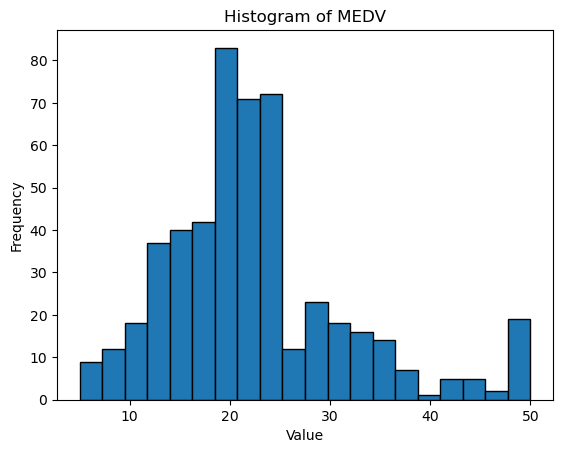

In [38]:
plt.hist(data['MEDV'], bins=20, edgecolor='black')  

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of MEDV')

plt.show()

### Partition the dataset into train, validation, and test sets.

In [39]:
# dropping missing data
data.dropna(inplace=True)

scaler = StandardScaler()
data = scaler.fit_transform(data)

data

array([[-0.40081837,  0.27334191, -1.25962   , ...,  0.43074011,
        -1.06712587,  0.17963958],
       [-0.39853454, -0.47905119, -0.56972405, ...,  0.43074011,
        -0.49719648, -0.08319067],
       [-0.39853672, -0.47905119, -0.56972405, ...,  0.38509692,
        -1.19727801,  1.35142445],
       ...,
       [-0.3965804 , -0.47905119,  0.13466553, ...,  0.43074011,
        -0.50541662, -0.19270327],
       [-0.39489501, -0.47905119,  0.13466553, ...,  0.43074011,
        -0.97670438,  0.16868832],
       [-0.38958205, -0.47905119,  0.13466553, ...,  0.39204993,
        -0.86162248, -0.03938562]])

In [40]:
labels = data[:, -1]
features = data[:, :-1]

In [41]:
# train - 20%, test = 10%
X_train, X_test_val, y_train, y_test_val = train_test_split(features, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.33, random_state=42)

len(X_train), len(X_val), len(X_test)

(275, 79, 40)

### Normalise and standarize the data. Make sure to handle the missing or inconsistent data values if necessary.

In [42]:
# Done before partitionaing

## 3.2 MLP Regression Implementation from Scratch

In [49]:
class MLPRegressor:
    def __init__(self, features, labels, num_epochs = 1000, lr = 0.1, 
                hidden_layers = [64, 64], activation = 'sigmoid', 
                 optimization_technique = 'batch_grad_des'):
        self.features = features
        self.labels = labels.reshape(-1, 1)
        self.num_epochs = num_epochs
        self.lr = lr
        self.num_classes = 1 
        self.num_samples = len(features)
        self.num_features = features.shape[1]
        
        # setting layers
        self.hidden_layers = hidden_layers
        self.layers = [self.num_features] + self.hidden_layers + [self.num_classes]
        
        # setting activation functions
        if activation == 'sigmoid':
            self.activation_func = self.sigmoid
            self.activation_func_der = self.sigmoid_der
        elif activation == 'tanh':
            self.activation_func = self.tanh
            self.activation_func_der = self.tanh_der
        elif activation == 'relu':
            self.activation_func = self.relu
            self.activation_func_der = self.relu_der
            
        # setting optimization function name
        self.optimization_technique = optimization_technique
        
    def init_params(self):               
        # setting model parameters
        self.weights, self.biases, self.activations = [], [], []
        
        # setting random weights and biases
        for i in range(len(self.layers) - 1):
            self.weights.append(np.random.randn(self.layers[i], self.layers[i+1]))
            self.biases.append(np.random.randn(1, self.layers[i+1]))
            
            # setting up activations simultaneously
            self.activations.append(None)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def tanh(self, x):
        return np.tanh(x)

    def relu(self, x):
        return np.maximum(0, x)

    def sigmoid_der(self, x):
        return x * (1 - x)

    def tanh_der(self, x):
        return 1 - x**2

    def relu_der(self, x):
        return np.where(x > 0, 1, 0)
    
    def softmax(self, matrix):
        exp_matrix = np.exp(matrix)
        return exp_matrix / np.sum(exp_matrix, axis = 1)[:, np.newaxis]
    
    def mse_loss(self, actual_prob, pred_probs):
        return mean_squared_error(actual_prob, pred_probs)
    
    def rmse_loss(self, actual_prob, pred_probs):
        return np.sqrt(self.mse_loss(actual_prob, pred_probs))
    
    def r2_loss(self, actual_prob, pred_probs):
        return r2_score(actual_prob, pred_probs)
    
    def print_metrics(self, epoch):        
        if self.print_training_metrics and epoch%self.print_discreteness == 0:
            final_output = self.predict(self.features)
            training_mse_loss = self.mse_loss(final_output, self.labels)
            training_rmse_loss = self.rmse_loss(final_output, self.labels)
            training_r2_loss = self.r2_loss(final_output, self.labels)
            
            print("Epoch {}:".format(epoch))
            print("\tTotal MSE training loss is {}".format(training_mse_loss))
            print("\tTotal RMSE training loss is {}".format(training_rmse_loss))
            print("\tTotal R-squared training value is {}".format(training_r2_loss))

        if self.validation_features is not None and self.validation_labels is not None and epoch%self.print_discreteness == 0:
                final_output = self.predict(self.features)
                training_mse_loss = self.mse_loss(final_output, self.labels)
                valid_final_output = self.predict(self.validation_features)
                valid_mse_loss = self.mse_loss(valid_final_output, self.validation_labels)
                valid_rmse_loss = self.rmse_loss(valid_final_output, self.validation_labels)
                valid_r2_loss = self.r2_loss(valid_final_output, self.validation_labels)
                
                if self.print_validation_metrics:
                    print("\tTotal MSE validation loss is {}".format(valid_mse_loss))
                    print("\tTotal RMSE validation loss is {}".format(valid_rmse_loss))
                    print("\tTotal R-squared validation value is {}".format(valid_r2_loss))
                
                if self.wandb_en:
                    wandb.log({ 
                               "valid_mse_loss": valid_mse_loss,
                               "train_mse_loss": training_mse_loss
                              })
    
    def forward(self, features):
        layer_enc = features @ self.weights[0] + self.biases[0]
        self.activations[0] = self.activation_func(layer_enc)
        
        for i in range(0, len(self.hidden_layers)):
            layer_enc = self.activations[i] @ self.weights[i+1] + self.biases[i+1]
            self.activations[i+1] = self.activation_func(layer_enc)

    def forward_no_grad(self, features):
        layer_enc = features @ self.weights[0] + self.biases[0]
        layer_activated = self.activation_func(layer_enc)
        
        for i in range(0, len(self.hidden_layers)):
            layer_enc = layer_activated @ self.weights[i+1] + self.biases[i+1]
            layer_activated = self.activation_func(layer_enc)
            
        return layer_activated
    
    def predict(self, features):
        return self.forward_no_grad(features)
    
    def backward(self, features, probs):
        error = probs - self.activations[-1]
                
        deltas = [error * self.activation_func_der(self.activations[-1])]
        
        for i in range(len(self.hidden_layers) - 1, -1, -1):
            error = deltas[-1] @ self.weights[i + 1].T
            delta = error * self.activation_func_der(self.activations[i])
            deltas.append(delta)
            
        deltas.reverse()
        
        for i in range(len(self.weights)):
            if i == 0:
                self.weights[i] += features.T @ deltas[i] * self.lr
            else:
                self.weights[i] += self.activations[i - 1].T @ deltas[i] * self.lr
            self.biases[i] += np.sum(deltas[i], axis=0, keepdims=True) * self.lr
    
    def train_batch_grad_des(self):
        for epoch in range(self.num_epochs):
            # calculating gradients
            self.forward(self.features)
            
            # progagating gradients backward
            self.backward(self.features, self.labels)
            
            self.print_metrics(epoch)

    def train_stoch_grad_des(self):
        for epoch in range(self.num_epochs):
            for x, y in zip(self.features, self.labels):
                x, y = x.reshape(1, -1), y.reshape(1, -1)
                
                # calculating gradients
                self.forward(x)

                # progagating gradients backward
                self.backward(x, y)
            
            self.print_metrics(epoch)
            
    def train_mini_batch_grad_des(self, batch_size = 1000):
        for epoch in range(self.num_epochs):
            for i in range(0, len(self.features), batch_size):
                x = self.features[i:i + batch_size]
                y = self.labels[i:i + batch_size]
                               
                # calculating gradients
                self.forward(x)

                # progagating gradients backward
                self.backward(x, y)
            
            self.print_metrics(epoch)

    def fit(self, print_training_metrics = False, print_discreteness = 100, 
            validation_features = None, validation_labels = None, 
            print_validation_metrics = True, wandb_en = False,
            return_validation_metrics = False,
            print_final_training_metrics = True):

        # setting up initial parameters
        self.init_params()
        
        # setting up some hyperparameters
        self.print_training_metrics = print_training_metrics
        self.print_discreteness = print_discreteness
        self.validation_features = validation_features
        self.validation_labels = validation_labels
        self.print_validation_metrics = print_validation_metrics
        self.wandb_en = wandb_en
        
        if self.optimization_technique == 'batch_grad_des':
            self.train_batch_grad_des()
        elif self.optimization_technique == 'mini_grad_des':
            self.train_mini_batch_grad_des()
        elif self.optimization_technique == 'stoch_grad_des':
            self.train_stoch_grad_des()
        else:
            print("NOT a valid optimization technique!")
            return None

        final_output = self.predict(self.features)
        training_mse_loss = self.mse_loss(final_output, self.labels)
        training_rmse_loss = self.rmse_loss(final_output, self.labels)
        training_r2_loss = self.r2_loss(final_output, self.labels)
        
        if print_final_training_metrics:
            print("\nFinal Metrics:")
            print("\tTotal MSE training loss is {}".format(training_mse_loss))
            print("\tTotal RMSE training loss is {}".format(training_rmse_loss))
            print("\tTotal R-squared training value is {}".format(training_r2_loss))

        
        if True: # I don't want to hit backspace in all the faollowing lines
            if self.validation_features is not None and self.validation_labels is not None:

                valid_final_output = self.predict(self.validation_features)
                valid_mse_loss = self.mse_loss(valid_final_output, self.validation_labels)
                valid_rmse_loss = self.rmse_loss(valid_final_output, self.validation_labels)
                valid_r2_loss = self.r2_loss(valid_final_output, self.validation_labels)
                
                print("\tTotal MSE validation loss is {}".format(valid_mse_loss))
                print("\tTotal RMSE validation loss is {}".format(valid_rmse_loss))
                print("\tTotal R-squared validation value is {}".format(valid_r2_loss))
                
                if self.wandb_en:
                    wandb.log({ 
                               "valid_mse_loss": valid_mse_loss,
                               "train_mse_loss": training_mse_loss
                              })
        
        if return_validation_metrics:            
            return [
                valid_mse_loss,
                valid_rmse_loss,
                valid_r2_loss
            ]
        
        return [
            training_mse_loss,
            training_rmse_loss,
            training_r2_loss
        ]

In [44]:
myMLPR = MLPRegressor(X_train, y_train, num_epochs=5, lr = 0.01,
                hidden_layers = [64, 128, 56], activation = 'tanh', 
                optimization_technique = 'batch_grad_des')
myMLPR.fit(print_training_metrics = True, print_discreteness = 1)

Epoch 0:
	Total MSE training loss is 1.07648700875034
	Total RMSE training loss is 1.037538919149706
	Total R-squared training value is -0.20242675252324638
Epoch 1:
	Total MSE training loss is 0.7760424374910843
	Total RMSE training loss is 0.880932708832567
	Total R-squared training value is 0.17687138912505695
Epoch 2:
	Total MSE training loss is 0.6638042281657253
	Total RMSE training loss is 0.8147418168755826
	Total R-squared training value is 0.28986159974590864
Epoch 3:
	Total MSE training loss is 0.6364539502339992
	Total RMSE training loss is 0.7977806404231674
	Total R-squared training value is 0.3405294785512176
Epoch 4:
	Total MSE training loss is 0.6463116587031519
	Total RMSE training loss is 0.803935108515079
	Total R-squared training value is 0.32849856918845666

Final Metrics:
	Total MSE training loss is 0.6463116587031519
	Total RMSE training loss is 0.803935108515079
	Total R-squared training value is 0.32849856918845666


[0.6463116587031519, 0.803935108515079, 0.32849856918845666]

In [47]:
myMLPR = MLPRegressor(X_train, y_train, num_epochs=1000, lr = 0.001,
                hidden_layers = [64, 128, 56], activation = 'tanh', 
                optimization_technique = 'batch_grad_des')
myMLPR.fit(print_training_metrics = True, print_discreteness = 250)

Epoch 0:
	Total MSE training loss is 1.062484383689936
	Total RMSE training loss is 1.0307688313535368
	Total R-squared training value is -0.19189888128863086
Epoch 250:
	Total MSE training loss is 0.5894748513795685
	Total RMSE training loss is 0.7677726560509748
	Total R-squared training value is 0.2210067780389694
Epoch 500:
	Total MSE training loss is 0.566607367173289
	Total RMSE training loss is 0.7527332642930622
	Total R-squared training value is 0.2317405705489506
Epoch 750:
	Total MSE training loss is 0.5551712596704678
	Total RMSE training loss is 0.7450981543867008
	Total R-squared training value is 0.23276148022434717

Final Metrics:
	Total MSE training loss is 0.5054138917567943
	Total RMSE training loss is 0.7109246737572091
	Total R-squared training value is 0.2979932220911462


[0.5054138917567943, 0.7109246737572091, 0.2979932220911462]

## 3.2 Model Training & Hyperparameter Tuning using W&B

In [54]:
wandb.init(
    project="smai-A3-problem-3",
    
    config={
        "lr": 0.005,
        "epochs": 1000,
        "activation": 'sigmoid',
        "hidden_layers": [64, 128, 80],
        "optimization_technique": "batch_grad_des"
    }
)

myMLPR = MLPRegressor(X_train, y_train, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPR.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total MSE training loss is 0.5527538377125426
	Total RMSE training loss is 0.7434741674816567
	Total R-squared training value is -3.1455906261444406
	Total MSE validation loss is 0.4212805395029221
	Total RMSE validation loss is 0.6490612756149623
	Total R-squared validation value is -2.6914179130383107


train_mse_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_mse_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_mse_loss,0.55275
valid_mse_loss,0.42128


In [55]:
wandb.init(
    project="smai-A3-problem-3",
    
    config={
        "lr": 0.0001,
        "epochs": 1000,
        "activation": 'sigmoid',
        "hidden_layers": [64, 128, 80],
        "optimization_technique": "batch_grad_des"
    }
)

myMLPR = MLPRegressor(X_train, y_train, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPR.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total MSE training loss is 0.7062214304330087
	Total RMSE training loss is 0.8403698176594687
	Total R-squared training value is -7.249727628063329
	Total MSE validation loss is 0.5093970615529081
	Total RMSE validation loss is 0.7137205766635204
	Total R-squared validation value is -4.244541695113391


train_mse_loss,███▇▅▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
valid_mse_loss,███▆▅▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
train_mse_loss,0.70622
valid_mse_loss,0.5094


In [58]:
wandb.init(
    project="smai-A3-problem-3",
    
    config={
        "lr": 0.001,
        "epochs": 1000,
        "activation": 'sigmoid',
        "hidden_layers": [64, 128, 256, 80, 56],
        "optimization_technique": "batch_grad_des"
    }
)

myMLPR = MLPRegressor(X_train, y_train, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPR.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total MSE training loss is 0.5557430865286139
	Total RMSE training loss is 0.7454817814867202
	Total R-squared training value is -3.2178326480019175
	Total MSE validation loss is 0.403219509842211
	Total RMSE validation loss is 0.634995677026396
	Total R-squared validation value is -2.358813814729279


train_mse_loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_mse_loss,█▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_mse_loss,0.55574
valid_mse_loss,0.40322


In [59]:
wandb.init(
    project="smai-A3-problem-3",
    
    config={
        "lr": 0.5,
        "epochs": 1000,
        "activation": 'sigmoid',
        "hidden_layers": [64, 128, 80],
        "optimization_technique": "batch_grad_des"
    }
)

myMLPR = MLPRegressor(X_train, y_train, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPR.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total MSE training loss is 2.0487401623953785
	Total RMSE training loss is 1.431342084337416
	Total R-squared training value is 0.0
	Total MSE validation loss is 1.7553477921190435
	Total RMSE validation loss is 1.324895389122871
	Total R-squared validation value is 0.0


train_mse_loss,▁████████████████████
valid_mse_loss,▁████████████████████
train_mse_loss,2.04874
valid_mse_loss,1.75535


In [61]:
wandb.init(
    project="smai-A3-problem-3",
    
    config={
        "lr": 0.005,
        "epochs": 1000,
        "activation": 'sigmoid',
        "hidden_layers": [24, 64, 128, 256, 80, 56, 18],
        "optimization_technique": "batch_grad_des"
    }
)

myMLPR = MLPRegressor(X_train, y_train, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPR.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total MSE training loss is 0.5514181328126432
	Total RMSE training loss is 0.7425753381392646
	Total R-squared training value is -3.0012207398897166
	Total MSE validation loss is 0.4318248509349623
	Total RMSE validation loss is 0.6571338150901704
	Total R-squared validation value is -2.413565849833597


train_mse_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_mse_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_mse_loss,0.55142
valid_mse_loss,0.43182


In [62]:
wandb.init(
    project="smai-A3-problem-3",
    
    config={
        "lr": 0.001,
        "epochs": 1000,
        "activation": 'sigmoid',
        "hidden_layers": [24, 18],
        "optimization_technique": "batch_grad_des"
    }
)

myMLPR = MLPRegressor(X_train, y_train, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPR.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total MSE training loss is 0.588814556617061
	Total RMSE training loss is 0.7673425288729023
	Total R-squared training value is -3.674710883561776
	Total MSE validation loss is 0.44508016295644626
	Total RMSE validation loss is 0.6671432851767649
	Total R-squared validation value is -2.6775372604698204


train_mse_loss,█▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_mse_loss,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_mse_loss,0.58881
valid_mse_loss,0.44508


In [63]:
wandb.init(
    project="smai-A3-problem-3",
    
    config={
        "lr": 0.001,
        "epochs": 1000,
        "activation": 'tanh',
        "hidden_layers": [24, 18],
        "optimization_technique": "batch_grad_des"
    }
)

myMLPR = MLPRegressor(X_train, y_train, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPR.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total MSE training loss is 0.23906263135257813
	Total RMSE training loss is 0.4889403147139517
	Total R-squared training value is 0.5004900743219631
	Total MSE validation loss is 0.41748230677097403
	Total RMSE validation loss is 0.6461287075892651
	Total R-squared validation value is 0.15720365750683618


train_mse_loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_mse_loss,█▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_mse_loss,0.23906
valid_mse_loss,0.41748


In [64]:
wandb.init(
    project="smai-A3-problem-3",
    
    config={
        "lr": 0.001,
        "epochs": 1000,
        "activation": 'sigmoid',
        "hidden_layers": [24, 18],
        "optimization_technique": "mini_grad_des"
    }
)

myMLPR = MLPRegressor(X_train, y_train, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPR.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total MSE training loss is 0.5885119153811266
	Total RMSE training loss is 0.7671453026520638
	Total R-squared training value is -3.767190158647024
	Total MSE validation loss is 0.42334678533625547
	Total RMSE validation loss is 0.6506510472874499
	Total R-squared validation value is -2.4639829355876173


train_mse_loss,█▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_mse_loss,█▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_mse_loss,0.58851
valid_mse_loss,0.42335


In [65]:
wandb.init(
    project="smai-A3-problem-3",
    
    config={
        "lr": 0.001,
        "epochs": 1000,
        "activation": 'tanh',
        "hidden_layers": [24, 18],
        "optimization_technique": "mini_grad_des"
    }
)

myMLPR = MLPRegressor(X_train, y_train, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPR.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total MSE training loss is 0.22678158448577837
	Total RMSE training loss is 0.47621590112655665
	Total R-squared training value is 0.552769602198121
	Total MSE validation loss is 0.39792443228210933
	Total RMSE validation loss is 0.6308125175375876
	Total R-squared validation value is 0.3157744159925512


train_mse_loss,█▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_mse_loss,█▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_mse_loss,0.22678
valid_mse_loss,0.39792


In [66]:
wandb.init(
    project="smai-A3-problem-3",
    
    config={
        "lr": 0.001,
        "epochs": 1000,
        "activation": 'tanh',
        "hidden_layers": [24, 18],
        "optimization_technique": "stoch_grad_des"
    }
)

myMLPR = MLPRegressor(X_train, y_train, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPR.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total MSE training loss is 0.3289547858595593
	Total RMSE training loss is 0.5735458010129263
	Total R-squared training value is 0.40271177574184713
	Total MSE validation loss is 0.5362494542256196
	Total RMSE validation loss is 0.7322905531451431
	Total R-squared validation value is 0.13796498026235038


train_mse_loss,█▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_mse_loss,█▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_mse_loss,0.32895
valid_mse_loss,0.53625


In [67]:
wandb.init(
    project="smai-A3-problem-3",
    
    config={
        "lr": 0.001,
        "epochs": 1000,
        "activation": 'tanh',
        "hidden_layers": [24, 64, 128, 42],
        "optimization_technique": "batch_grad_des"
    }
)

myMLPR = MLPRegressor(X_train, y_train, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPR.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total MSE training loss is 0.3385363162773072
	Total RMSE training loss is 0.5818387373467903
	Total R-squared training value is 0.4552482211789769
	Total MSE validation loss is 0.7935430572798283
	Total RMSE validation loss is 0.8908103374343095
	Total R-squared validation value is 0.07761319564404345


train_mse_loss,█▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_mse_loss,█▃▃▄▄▃▃▃▃▃▁▁▁▁▂▂▂▂▁▂▂
train_mse_loss,0.33854
valid_mse_loss,0.79354


In [68]:
wandb.init(
    project="smai-A3-problem-3",
    
    config={
        "lr": 0.001,
        "epochs": 1000,
        "activation": 'relu',
        "hidden_layers": [24, 18],
        "optimization_technique": "stoch_grad_des"
    }
)

myMLPR = MLPRegressor(X_train, y_train, num_epochs=wandb.config['epochs'], lr = wandb.config['lr'],
                hidden_layers = wandb.config['hidden_layers'], activation = wandb.config['activation'], 
                optimization_technique = wandb.config['optimization_technique'])
myMLPR.fit(print_training_metrics = False, print_discreteness = 50,
            validation_features=X_val, 
            validation_labels=y_val,
            print_validation_metrics=False,
            wandb_en=True
          )

wandb.finish()


Final Metrics:
	Total MSE training loss is 0.9420133320600197
	Total RMSE training loss is 0.9705737128420591
	Total R-squared training value is 0.0
	Total MSE validation loss is 0.662159693816594
	Total RMSE validation loss is 0.8137319545259324
	Total R-squared validation value is 0.0


train_mse_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_mse_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_mse_loss,0.94201
valid_mse_loss,0.66216


#### Bets results were found in 

```
wandb.init(
    project="smai-A3-problem-3",
    
    config={
        "lr": 0.001,
        "epochs": 1000,
        "activation": 'tanh',
        "hidden_layers": [24, 18],
        "optimization_technique": "batch_grad_des"
    }
)

```

### You have to report the scores(ordered) for all the combinations of

In [71]:
tuning_list = []

for optim in ['batch_grad_des', 'mini_grad_des', 'stoch_grad_des']:
    for activation in ['sigmoid', 'tanh', 'relu']:
        print("{} - {}".format(optim, activation))
        myMLPR = MLPRegressor(X_train, y_train, num_epochs=1000, lr = 0.001,
                        hidden_layers = [24, 18], activation = activation, 
                        optimization_technique = optim)
        ret = myMLPR.fit(print_training_metrics = False, print_discreteness = 100000,
                    validation_features=X_val, 
                    validation_labels=y_val,
                    print_validation_metrics=False,
                    wandb_en=False,
                    return_validation_metrics = True,
                    print_final_training_metrics = False
                  )
        
        tuning_list.append([
            ret[0], ret[1], ret[2], optim, activation
        ])

batch_grad_des - sigmoid
	Total MSE validation loss is 0.44010565457856515
	Total RMSE validation loss is 0.663404593425886
	Total R-squared validation value is -3.16277641302964
batch_grad_des - tanh
	Total MSE validation loss is 0.50961253052139
	Total RMSE validation loss is 0.7138715084112757
	Total R-squared validation value is 0.08750894241547846
batch_grad_des - relu
	Total MSE validation loss is 0.662159693816594
	Total RMSE validation loss is 0.8137319545259324
	Total R-squared validation value is 0.0
mini_grad_des - sigmoid
	Total MSE validation loss is 0.43672531335014353
	Total RMSE validation loss is 0.6608519602378006
	Total R-squared validation value is -2.6529105151128154
mini_grad_des - tanh
	Total MSE validation loss is 0.32777176203467656
	Total RMSE validation loss is 0.5725135474682469
	Total R-squared validation value is 0.37429067950528305
mini_grad_des - relu
	Total MSE validation loss is 0.662159693816594
	Total RMSE validation loss is 0.8137319545259324
	Total

In [72]:
sorted_tuning_list = sorted(tuning_list, key=lambda x: x[0])

In [73]:
from tabulate import tabulate
headers = ["MSE", "RMSE", "R-squared", "Optimization Technique", "Activation Function"]
table = tabulate(sorted_tuning_list, headers, tablefmt="grid")

# Print the tabulated data
print(table)

+----------+----------+-------------+--------------------------+-----------------------+
|      MSE |     RMSE |   R-squared | Optimization Technique   | Activation Function   |
+==========+==========+=============+==========================+=======================+
| 0.327772 | 0.572514 |   0.374291  | mini_grad_des            | tanh                  |
+----------+----------+-------------+--------------------------+-----------------------+
| 0.397167 | 0.630211 |   0.355365  | stoch_grad_des           | tanh                  |
+----------+----------+-------------+--------------------------+-----------------------+
| 0.430217 | 0.655909 |  -2.3727    | stoch_grad_des           | sigmoid               |
+----------+----------+-------------+--------------------------+-----------------------+
| 0.436725 | 0.660852 |  -2.65291   | mini_grad_des            | sigmoid               |
+----------+----------+-------------+--------------------------+-----------------------+
| 0.440106 | 0.663405

#### Results
    Once again the best results are found with mini_grad_desc and tanh activation

### Report metrics: MSE, RMSE, R-squared.

    Done in previous sections

### Report the parameters for the best model that you get

    Mentioned explicitly in 3.3.1

## 3.4  Evaluating Model

In [74]:
myMLPR = MLPRegressor(X_train, y_train, num_epochs=1000, lr = 0.001,
                        hidden_layers = [24, 18], activation = 'tanh', 
                        optimization_technique = 'mini_grad_des')
myMLPR.fit(print_training_metrics = False, print_discreteness = 100000,
                    validation_features=X_val, 
                    validation_labels=y_val,
                    print_validation_metrics=False,
                    wandb_en=False,
                    return_validation_metrics = True,
                    print_final_training_metrics = False
                  )

	Total MSE validation loss is 0.4715889195067629
	Total RMSE validation loss is 0.6867233209282781
	Total R-squared validation value is 0.20858439872199164


[0.4715889195067629, 0.6867233209282781, 0.20858439872199164]

In [75]:
y_pred = myMLPR.predict(X_test)

In [76]:
valid_mse_loss = myMLPR.mse_loss(y_pred, y_test)
valid_rmse_loss = myMLPR.rmse_loss(y_pred, y_test)
valid_r2_loss = myMLPR.r2_loss(y_pred, y_test)
                
print("\tTotal MSE test loss is {}".format(valid_mse_loss))
print("\tTotal RMSE test loss is {}".format(valid_rmse_loss))
print("\tTotal R-squared test value is {}".format(valid_r2_loss))

	Total MSE test loss is 1.2701126696323823
	Total RMSE test loss is 1.126992754915657
	Total R-squared test value is -0.8865073853523904
